### AirBnB Price Prediction Case Study

* Submitted by: Anubhav Gautam (anubgautam@deloitte.com)
* Analyst, Cyber Risk Servies, Deloitte USI Advisory

## Table of Contents

- Introduction and Objective
- Data cleaning and pre-processing
- Exploratory Data Analysis
- Preparing the data for modelling
- Building predictive models
- Model evaluations and analysis
- Using NLP techniques
- Conclusions
- Future Work and recommendation

## Introduction and Objective

Airbnb is a home-sharing platform that allows home-owners and renters ('hosts') to put their properties ('listings') online, so that guests can pay to stay in them. Hosts are expected to set their own prices for their listings. Although Airbnb and other sites provide some general guidance, there are currently no free services which help hosts price their properties. Paid third party pricing software is available, but generally you are required to put in your own expected average price ('base price'), and the algorithm will vary the daily price around that base price on each day depending on day of the week, seasonality, how far away the date is, and other factors.

Airbnb pricing is important to get right, particularly in big cities like New York City, Los Angeles etc., where there's lots of competition and even small differences in prices can make the difference between optimum occupancy and high earnings, or being priced out of the market. It is also a difficult thing to do correctly, in order to balance the price with occupancy (which varies inversely with price) in order to maximise revenue.

This project aims to use machine learning and deep learning to predict the base price for properties in some of the major cities in the US(SF, NYC, DC, LA, Boston, Chicago).

## The Dataset

## |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

## Phase 1 : Cleaning and pre-processing

### Importing the libraries and data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from math import sqrt
from sklearn.metrics import mean_squared_error
import time
from datetime import datetime
%matplotlib inline
from numpy.random import seed
seed(123)
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from IPython.display import SVG
from statsmodels.tsa.seasonal import seasonal_decompose
from keras import models, layers, optimizers, regularizers
from keras.utils.vis_utils import model_to_dot

C:\Users\anubgautam\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
pd.__version__ #Debugging

'0.24.2'

 Loading data

In [3]:
raw_df = pd.read_csv('train.csv')
pd.set_option('display.max_columns', len(raw_df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
raw_df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [4]:
raw_df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [5]:
#raw_df = raw_df.astype({'cleaning_fee' : bool, 'host_has_profile_pic': bool, 'host_identity_verified': bool, 'instant_bookable': bool})

In [6]:
raw_df.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [7]:
raw_df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


### Dropping initial columns

NLP techniques will not be used in the creation of an initial model (although they could be used to augment the model later, e.g. through sentiment analysis). Therefore, free text columns will be dropped for now, as will other columns which are not useful for predicting price (e.g. url, host name and other host-related features that are unrelated to the property).

In [8]:
cols_to_drop = ['description', 'name', 'neighbourhood', 'thumbnail_url']
df = raw_df.drop(cols_to_drop, axis = 1)

In [9]:
df.set_index('id', inplace=True)

In [10]:
df.isna().sum()

log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
number_of_reviews             0
review_scores_rating      16722
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

There are multiple columns for property location, including an attempt by the site that originally scraped the data to clean up the neighbourhood locations. Some of these columns can be dropped. One columns for area (neighbourhood) will be kept - 'neighboorhood'. Latitude and longitude will be saved in a dataframe for later use (see modelling section below).

In [11]:
lat_long = df[['latitude', 'longitude']]

Since we have the Latitudes and Longitudes for the respective neighbourhoods, we will obtain the coordinates for the city center, calculate the distance of that neighbourhood from the city center coordinates. This will be reflected in the 'distance_to_center' feature below.

In [12]:
City = ['Boston', 'Chicago', 'DC', 'LA', 'NYC', 'SF']
lat = [37.78, 42.36, 41.88, 38.91, 40.72, 34.06]
long = [-122.42, -71.08, -87.63, -77.04, -74.00, -118.25]

def lat_center(row):
    for i in range(0,6):
        if (row['city']==City[i]):
            return lat[i]
    
def long_center(row):
    for i in range(0,6):
        if (row['city']==City[i]):
            return long[i]

df['lat_center']=df.apply(lambda row: lat_center(row), axis=1)
df['long_center']=df.apply(lambda row: long_center(row), axis=1)

In [13]:
df['distance_to_center']=np.sqrt((df['lat_center']-df['latitude'])**2+(df['long_center']-df['longitude'])**2)

In [14]:
df.drop(['zipcode', 'latitude', 'longitude', 'lat_center', 'long_center'], axis = 1, inplace = True)

Checking whether boolean and categorical features contain sufficient numbers of instances in each category to make them worth including:

In [15]:
# Replacing columns with f/t with 0/1
df.replace({'f': 0, 't': 1}, inplace=True)
# Plotting the distribution of NUMERICAL and BOOLEAN features
# hist = df.hist(figsize=(20,20));

From the above, it can be seen that a few columns only contain one category and can be dropped:

In [16]:
df.drop('host_has_profile_pic', axis = 1, inplace = True)




### Description of each column:





## |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

**host_since**

This is a datetime column, and will be converted into a measure of the number of days that a host has been on the platform, measured from the date that the data was scraped (assuming June 19, 2019). The original column will be left in initially for EDA, and dropped later.

In [17]:
# Converting to datetime
df.host_since = pd.to_datetime(df.host_since) 

# Calculating the number of days
df['host_days_active'] = (datetime(2019, 6, 19) - df.host_since).astype('timedelta64[D]')

# Printing mean and median
print("Mean days as host:", round(df['host_days_active'].mean(),0))
print("Median days as host:", df['host_days_active'].median())

# Replacing null values with the median
df.host_days_active.fillna(df.host_days_active.median(), inplace=True)

Mean days as host: 1794.0
Median days as host: 1725.0


**host_response_rate**


About a third of rows don't have a value for host_response_rate, Therefore this section of the dataset consists primarily of properties which have not yet had a completed stay (most likely properties which have not yet had a booking, although may also include properties that have a booking currently occuring). Although this is a considerable proportion of the dataset, these listings will be retained in the data because they are still legitimate properties with advertised prices, and are still part of the comparative market when considering the price for which to advertise your Airbnb listing. However, if the dataset being used had the actual average price paid as its target, it would be necessary to drop these rows because they would not have a value, as they have not yet been booked.

It is worth noting, however, that this group of listings probably also contains a large number of 'inactive' listings. These are properties which have been speculatively listed on Airbnb but either have their calendars closed (so no stays can be booked), or have prices which are notably higher than other properties in their area. The latter occurs in some cases when people who 
regularly live in a property put their property on Airbnb at a high price just to see if anyone is willing to book at that price (some Airbnb listings are indeed booked at very high prices). Then if their property is booked, they will decamp to a cheaper hotel for those dates, and pocket the difference in price.

Because host_response_rate is unknown for so many listings, it will be retained as its own category, 'unknown'.

In [18]:
print("Null values:", df.host_response_rate.isna().sum())
print(f"Proportion: {round((df.host_response_rate.isna().sum()/len(df))*100, 1)}%")

Null values: 18299
Proportion: 24.7%


In [19]:
# Removing the % sign from the host_response_rate string and converting to an integer
df.host_response_rate = df.host_response_rate.str[:-1].astype('float64')

print("Mean host response rate:", round(df['host_response_rate'].mean(),0))
print("Median host response rate:", df['host_response_rate'].median())
print(f"Proportion of 100% host response rates: {round(((df.host_response_rate == 100.0).sum()/df.host_response_rate.count())*100,1)}%")

Mean host response rate: 94.0
Median host response rate: 100.0
Proportion of 100% host response rates: 77.5%


In [20]:
# Bin into four categories
df.host_response_rate = pd.cut(df.host_response_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# Converting to string
df.host_response_rate = df.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df.host_response_rate.replace('nan', 'unknown', inplace=True)

# Category counts
df.host_response_rate.value_counts()

100%       43254
unknown    18299
50-89%      7291
90-99%      3192
0-49%       2075
Name: host_response_rate, dtype: int64

**property_type**

Some cleaning of property types is required as there are a large number of categories with only a few listings. The categories 'apartment', 'house' and 'other' will be used, as most properties can be classified as either apartments or houses.

In [21]:
df.property_type.value_counts()

Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
Chalet                    6
Earth House               4
Tipi                      3
Cave                      2
Train                     2
Island                    1
Lighthouse                1
Casa particular           1
Parking Space             1
Name: property_type,

In [22]:
# Replacing categories that are types of houses or apartments
df.property_type.replace({
    'Townhouse': 'House',
    'Serviced apartment': 'Apartment',
    'Loft': 'Apartment',
    'Bungalow': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Earth house': 'House',
    'Chalet': 'House'  
    }, inplace=True)

# Replacing other categories with 'other'
df.loc[~df.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'

** bathrooms, bedrooms and beds**

Missing values will be replaced with the median (to avoid strange fractions).

In [23]:
for col in ['bathrooms', 'bedrooms', 'beds']:
    df[col].fillna(df[col].median(), inplace=True)

**bed_type**

Most listings have same bed type, but the other types can not be ignored as it is not a negligible number. We retain this feature at this point.

In [24]:
df.bed_type.value_counts()

Real Bed         72028
Futon              753
Pull-out Sofa      585
Airbed             477
Couch              268
Name: bed_type, dtype: int64

**amenities**

Amenities is a list of additional features in the property, e.g. whether it has a TV or parking. Examples are below:

In [25]:
# Example of amenities listed
df.amenities[:1].values

array(['{"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid friendly",Essentials,"Hair dryer",Iron,"translation missing: en.hosting_amenity_50"}'],
      dtype=object)

In [26]:
amenities_list = list(df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'',
 '24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'Air purifier',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Bath towel',
 'Bathtub',
 'Bathtub with shower chair',
 'Beach essentials',
 'Beachfront',
 'Bed linens',
 'Body soap',
 'Breakfast',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Changing table',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Cooking basics',
 'Crib',
 'Disabled parking spot',
 'Dishes and silverware',
 'Dishwasher',
 'Dog(s)',
 'Doorman',
 'Doorman Entry',
 'Dryer',
 'EV charger',
 'Elevator',
 'Elevator in building',
 'Essentials',
 'Ethernet connection',
 'Extra pillows and blankets',
 'Family/kid friendly',
 'Fire extinguisher',
 'Fireplace guards',
 'Firm matress',
 'Firm mattress',
 'First aid kit',
 'Fixed grab bars for shower & toilet',
 'Flat',
 'Flat smooth pathway to fro

In the list above, some amenities are more important than others (e.g. a balcony is more likely to increase price than a fax machine), and some are likely to be fairly uncommon (e.g. 'Electric profiling bed'). Based on previous experience, and research into which amenities are considered by guests to be more important, a selection of the more important amenities will be extracted. These will be further investigated in the EDA section. For example, if it turns out that almost all properties have/do not have a particular amenity, that feature will not be very useful in helping explain differences in prices.

The amenities chosen are (slashes indicate separate categories that can be combined):
- 24-hour check-in
- Air conditioning/central air conditioning
- Amazon Echo/Apple TV/DVD player/game console/Netflix/projector and screen/smart TV (i.e. non-basic electronics)
- BBQ grill/fire pit/propane barbeque
- Balcony/patio or balcony
- Beach view/beachfront/lake access/mountain view/ski-in ski-out/waterfront (i.e. great location/views)
- Bed linens
- Breakfast
- Cable TV/TV
- Coffee maker/espresso machine
- Cooking basics
- Dishwasher/Dryer/Washer/Washer and dryer
- Elevator
- Exercise equipment/gym/private gym/shared gym
- Family/kid friendly, or anything containing 'children'
- Free parking on premises/free street parking/outdoor parking/paid parking off premises/paid parking on premises
- Garden or backyard/outdoor seating/sun loungers/terrace
- Host greets you
- Hot tub/jetted tub/private hot tub/sauna/shared hot tub/pool/private pool/shared pool
- Internet/pocket wifi/wifi
- Long term stays allowed
- Pets allowed/cat(s)/dog(s)/pets live on this property/other pet(s)
- Private entrance
- Safe/security system
- Self check-in
- Smoking allowed
- Step-free access/wheelchair accessible, or anything containing 'accessible'
- Suitable for events

In [27]:
df.loc[df['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
df.loc[df['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
df.loc[df['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
df.loc[df['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
df.loc[df['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
df.loc[df['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
df.loc[df['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
df.loc[df['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
df.loc[df['amenities'].str.contains('TV'), 'tv'] = 1
df.loc[df['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
df.loc[df['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
df.loc[df['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
df.loc[df['amenities'].str.contains('Elevator'), 'elevator'] = 1
df.loc[df['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
df.loc[df['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
df.loc[df['amenities'].str.contains('parking'), 'parking'] = 1
df.loc[df['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
df.loc[df['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
df.loc[df['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
df.loc[df['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
df.loc[df['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
df.loc[df['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
df.loc[df['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
df.loc[df['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
df.loc[df['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
df.loc[df['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
df.loc[df['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

C:\Users\anubgautam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


One way to reduce the number of features (to avoid the curse of dimensionality) is to remove the amenities which add relatively little information, or are relatively unhelpful in differentiating between different listings. Amenity features where either the true or the false category contains fewer than 10% of listings will be removed.

In [28]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = df.iloc[:,41:].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)

# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in df.iloc[:,41:].columns:
    if df[col].sum() < len(df)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)

# Dropping infrequent amenity features
df.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
df.drop('amenities', axis=1, inplace=True)

['long_term_stays', 'private_entrance', 'self_check_in', 'smoking_allowed', 'accessible', 'event_suitable']


In [29]:
df.columns[40:]

Index(['internet', 'pets_allowed', 'secure'], dtype='object')

In [30]:
df.cleaning_fee.isna().sum()

0

**cleaning_fee**

This feature has Boolean rather than the actual fee. There are no missing values here. Replacing columns with FALSE/TRUE with 0/1.

In [31]:
# Replacing columns with FALSE/TRUE with 0/1 for Cleaning_fee
df.replace({'False': 0, 'True': 1}, inplace=True)

In [32]:
df['cleaning_fee'] = df['cleaning_fee'].astype(int)

**first_review and last_review**

About a quarter of listings have not had a review written for them. This is too large a proportion of the dataset to drop, and dropping the columns would lose a lot of useful information - reviews are very important in people's decisions to book, and therefore price.

This is also too large a proportion of the dataset to simply replace with median/mean values, as this would skew the distribution substantially. Also, the missing values here are not really missing values, as the fact that they are NaNs is meaningful - it tells us that these are new or previously unbooked listings that have not had reviews yet. In order to make the resulting model work able to predict prices for any Airbnb listing, including brand new listings, is is actually beneficial to keep them in. Therefore, these will be kept as an 'unknown' category, and the feature will have to be treated as categorical (and therefore one-hot encoded) rather than numerical.

In [33]:
print(f"Null values in 'first_review': {round(100*df.first_review.isna().sum()/len(df),1)}%")
print(f"Null values in 'review_scores_rating': {round(100*df.review_scores_rating .isna().sum()/len(df),1)}%")

Null values in 'first_review': 21.4%
Null values in 'review_scores_rating': 22.6%


In [34]:
df.first_review = pd.to_datetime(df.first_review) # Converting to datetime

# Calculating the number of days between the first review and the date the data was scraped
df['time_since_first_review'] = (datetime(2019, 6, 19) - df.first_review).astype('timedelta64[D]')

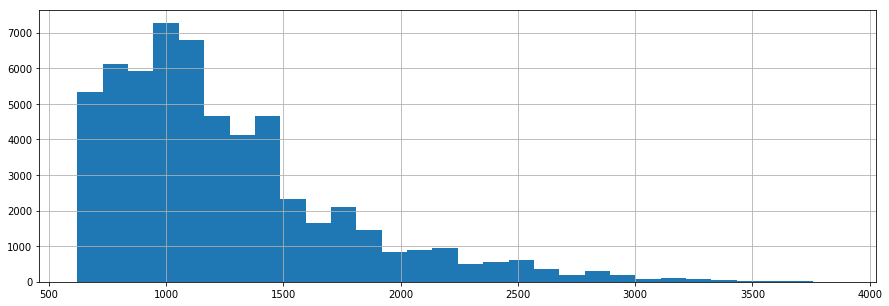

In [35]:
# Distribution of the number of days since first review
df.time_since_first_review.hist(figsize=(15,5), bins=30);

In [36]:
def bin_column(col, bins, labels, na_label='unknown'):
    """
    Takes in a column name, bin cut points and labels, replaces the original column with a
    binned version, and replaces nulls (with 'unknown' if unspecified).
    """
    df[col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    df[col] = df[col].astype('str')
    df[col].fillna(na_label, inplace=True)

In [37]:
# Binning time since first review
bin_column('time_since_first_review',
           bins=[0, 182, 365, 730, 1460, max(df.time_since_first_review)],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'],
           na_label='no reviews')

The same process will be followed for last_review:

In [38]:
df.last_review = pd.to_datetime(df.last_review) # Converting to datetime

# Calculating the number of days between the most recent review and the date the data was scraped
df['time_since_last_review'] = (datetime(2019, 6, 19) - df.last_review).astype('timedelta64[D]')

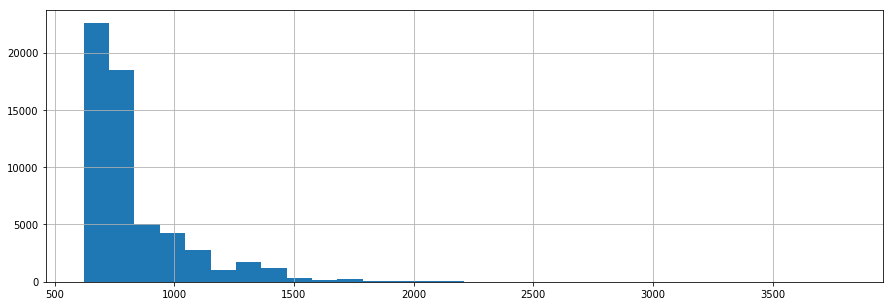

In [39]:
# Distribution of the number of days since last review
df.time_since_last_review.hist(figsize=(15,5), bins=30);

In [40]:
# Binning time since last review
bin_column('time_since_last_review',
           bins=[0, 14, 60, 182, 365, max(df.time_since_last_review)],
           labels=['0-2 weeks',
                   '2-8 weeks',
                   '2-6 months',
                   '6-12 months',
                   '1+ year'],
           na_label='no reviews')

In [41]:
# Dropping last_review - first_review will be kept for EDA and dropped later
df.drop('last_review', axis=1, inplace=True)

**review_score_ratings**

As above, listings without reviews will be kept and replaced with 'unknown'. Other ratings will be grouped into bins. The histograms below were produced in order to decide on useful bins. The majority of ratings are 9 or 10 out of 10, as also seen in the value count below. Therefore for these columns, 9/10 and 10/10 will be kept as separate groups, and 1-8/10 will be binned together (as this is, by Airbnb standards, a 'low' rating).

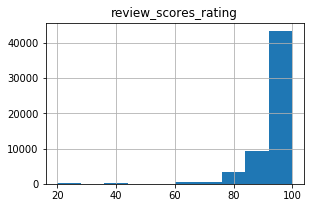

In [42]:
# Checking the distributions of the review ratings columns
variables_to_plot = list(df.columns[df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [43]:
# Creating a list of all review columns that are scored out of 10
variables_to_plot.pop(0)

'review_scores_rating'

In [44]:
# Binning for all columns scored out of 10
for col in variables_to_plot:
    bin_column(col,
               bins=[0, 8, 9, 10],
               labels=['0-8/10', '9/10', '10/10'],
               na_label='no reviews')

In [45]:
# Binning column scored out of 100
bin_column('review_scores_rating',
           bins=[0, 80, 95, 100],
           labels=['0-79/100', '80-94/100', '95-100/100'],
           na_label='no reviews')

**cancellation_policy**

Some cleaning of cancellation policy types is required, in order to categorise the four very small categories into the three larger categories (e.g. the super strict options are only available to long-term Airbnb hosts, and is invitation only).

In [46]:
df.cancellation_policy.value_counts()

strict             32374
flexible           22545
moderate           19063
super_strict_30      112
super_strict_60       17
Name: cancellation_policy, dtype: int64

In [47]:
# Replacing categories
df.cancellation_policy.replace({
    'super_strict_30': 'strict',
    'super_strict_60': 'strict',
    }, inplace=True)

In [48]:
df.head()

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,first_review,host_identity_verified,host_response_rate,host_since,instant_bookable,...,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,pets_allowed,secure,time_since_first_review,time_since_last_review
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6901257,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,1,NYC,2016-06-18,1.0,unknown,2012-03-26,0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,2-3 years,1+ year
6304928,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,1,NYC,2017-08-05,0.0,100%,2017-06-19,1,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1-2 years,1+ year
7919400,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,1,NYC,2017-04-30,1.0,100%,2016-10-25,1,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,2-3 years,1+ year
13418779,6.620073,House,Entire home/apt,4,1.0,Real Bed,flexible,1,SF,NaT,1.0,unknown,2015-04-19,0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,nan,nan
3808709,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,1,DC,2015-05-12,1.0,100%,2015-03-01,1,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,4+ years,1+ year


## Phase 2: Exploratory Data Analysis


### Time Series

*Question: how long have hosts been listing properties on Airbnb in London?*

Answer: the oldest London listing that is currently live on Airbnb was first listed on the site in March 2008. From 2011 onwards, the number of listings started increasing considerably. However, growth in the number of new hosts (of those currently listing on the site) has been decreasing since 2015, when the US government introduced a law in 2015 making it illegal to let short-term residential properties for more than 90 nights a year in some of the major cities.

A high level of seasonality is evident, with notable peaks in the summer when people put properties online to take advantage of the increased number of tourists in the summer holidays.

There is a big peak in the number of hosts joining Airbnb in 2015. This could be a response to the government legislation, as existing hosts may have created new accounts in order to re-list their properties and get around the 90 day limit.

In [49]:
print(f"Of the Airbnb hosts that are still listing on the site, the first joined on {min(df.host_since).strftime('%d %B %Y')}, and the most recent joined on {max(df.host_since).strftime('%d %B %Y')}.")

Of the Airbnb hosts that are still listing on the site, the first joined on 03 March 2008, and the most recent joined on 04 October 2017.


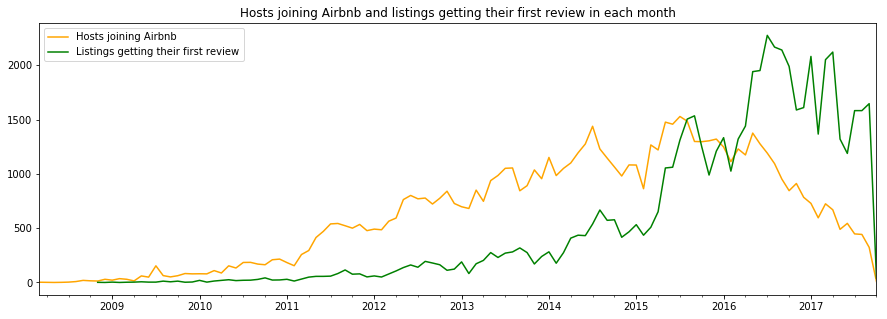

In [50]:
plt.figure(figsize=(15,5))
df.set_index('host_since').resample('MS').size().plot(label='Hosts joining Airbnb', color='orange')
df.set_index('first_review').resample('MS').size().plot(label='Listings getting their first review', color='green')
plt.title('Hosts joining Airbnb and listings getting their first review in each month')
plt.legend()
plt.xlim('2008-03-01', '2017-10-04') # Limiting to whole months
plt.xlabel('')
plt.ylabel('')
plt.show()

In [51]:
# Creating dataframes for time series analysis
ts_host_since = pd.DataFrame(df.set_index('host_since').resample('MS').size())
ts_first_review = pd.DataFrame(df.set_index('first_review').resample('MS').size())

# Renaming columns
ts_host_since = ts_host_since.rename(columns={0: 'hosts'})
ts_host_since.index.rename('month', inplace=True)
ts_first_review = ts_first_review.rename(columns={0: 'reviews'})
ts_first_review.index.rename('month', inplace=True)

In [52]:
def decompose_time_series(df, title=''):
    """
    Plots the original time series and its decomposition into trend, seasonal and residual.
    """
    # Decomposing the time series
    decomposition = seasonal_decompose(df)
    
    # Getting the trend, seasonality and noise
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    # Plotting the original time series and the decomposition
    plt.figure(figsize=(12,8))
    plt.suptitle(title, fontsize=14, y=1)
    plt.subplots_adjust(top=0.80)
    plt.subplot(411)
    plt.plot(df, label='Original')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='upper left')
    plt.tight_layout()

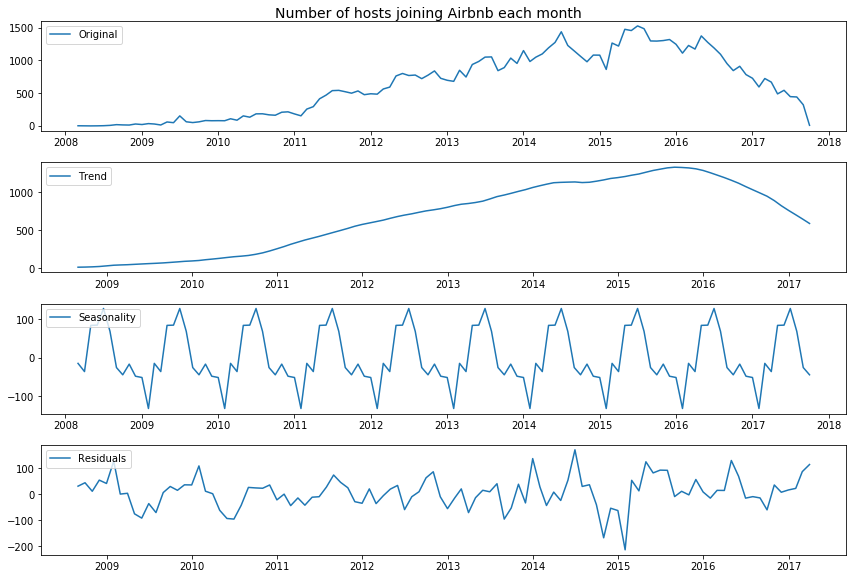

In [53]:
decompose_time_series(ts_host_since, title='Number of hosts joining Airbnb each month')

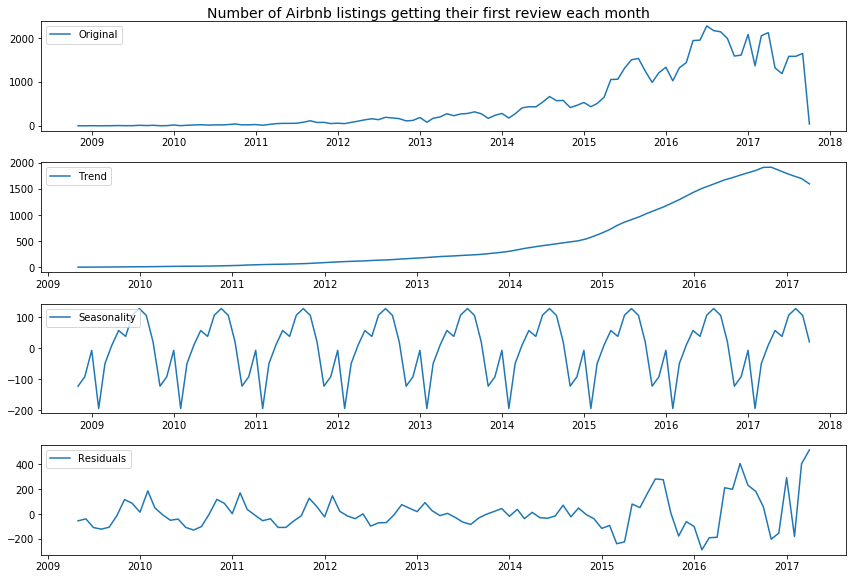

In [54]:
decompose_time_series(ts_first_review, title='Number of Airbnb listings getting their first review each month')

*Question: are the different patterns in the growth in the number of hosts and the number of listings due to hosts increasingly owning multiple properties?*

Answer: there are a number of professional Airbnb management companies which host a large number of listings under a single host profile, particularly from 2013 onwards. The largest manages 1654 listings and is aa management company based in Liverpool operating under the name 'Jp', while the second largest is the management company Veeve, managing 1304 listings.

However, we do not have enough data(number of properties owned by a host) to analyse this aspect.

*Question: how have prices changed over time?*

Answer: the average price per night for Airbnb listings in London has increased considerably over the last 10 years.Theere is a slight decrease in the prices aince 2013.

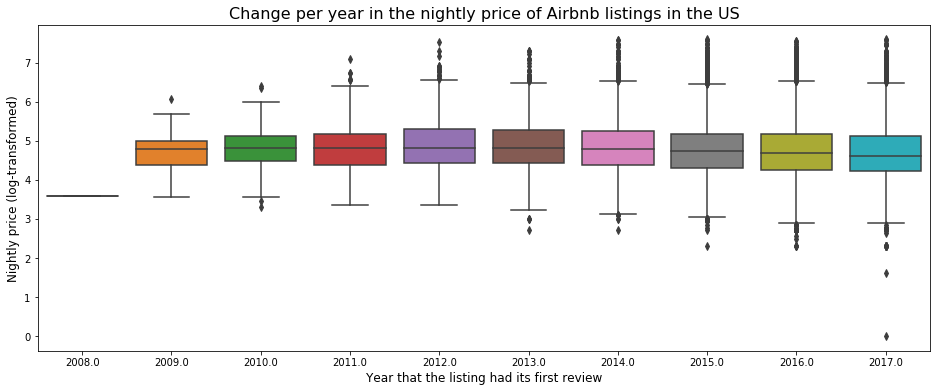

In [55]:
plt.figure(figsize=(16,6))
sns.boxplot(df.first_review.dt.year, df.log_price)
plt.xlabel('Year that the listing had its first review', fontsize=12)
plt.ylabel('Nightly price (log-transformed)', fontsize=12)
plt.title('Change per year in the nightly price of Airbnb listings in the US', fontsize=16)
plt.show()

In [56]:
print("Mean nightly price(log transformed) of listings in each year on Airbnb in the US:")
print(round(df.set_index('first_review').log_price.resample('YS').mean(),2))

Mean nightly price(log transformed) of listings in each year on Airbnb in the US:
first_review
2008-01-01    3.58
2009-01-01    4.73
2010-01-01    4.80
2011-01-01    4.84
2012-01-01    4.88
2013-01-01    4.87
2014-01-01    4.84
2015-01-01    4.78
2016-01-01    4.72
2017-01-01    4.69
Name: log_price, dtype: float64


### Numerical Features

In [57]:
# Dropping host_since and first_review as they are no longer needed
df.drop(['host_since', 'first_review'], axis=1, inplace=True)

In [58]:
# Filling NaN valules for newly created features with 0
df.fillna(0, inplace = True)

In [59]:
df.describe()

,log_price,accommodates,bathrooms,cleaning_fee,host_identity_verified,instant_bookable,number_of_reviews,bedrooms,beds,distance_to_center,host_days_active,check_in_24h,air_conditioning,high_end_electronics,...,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,pets_allowed,secure
count,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,...,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000
mean,4.782069,3.155146,1.234628,0.734075,0.671263,0.262458,20.900568,1.265467,1.709611,17.201947,1793.745193,0.256575,0.744964,0.006463,...,0.723995,0.047969,0.053406,0.598643,0.232584,0.101078,0.501167,0.320074,0.015234,0.016138,0.127430,0.966456,0.236874,0.155348
std,0.717394,2.153589,0.581386,0.441828,0.469757,0.439973,37.828641,0.851671,1.253389,19.441980,660.666662,0.436746,0.435885,0.080135,...,0.447022,0.213701,0.224844,0.490176,0.422482,0.301434,0.500002,0.466508,0.122483,0.126007,0.333457,0.180054,0.425167,0.362239
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000254,623.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.317488,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.071750,1276.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,4.709530,2.000000,1.000000,1.000000,1.000000,0.000000,6.000000,1.000000,1.000000,5.600597,1725.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,5.220356,4.000000,1.000000,1.000000,1.000000,1.000000,23.000000,1.000000,2.000000,41.542964,2249.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,7.600402,16.000000,8.000000,1.000000,1.000000,1.000000,605.000000,10.000000,18.000000,51.640575,4125.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**log_price**

*Question: what is the overall distribution of prices?*

Answer: nightly advertised prices range from $0 to $8(These are log transformed prices). The extreme ends of the range are due to hosts not understanding how to use Airbnb advertised prices (sometimes called 'sticker' prices) correctly. The advertised prices can be set to any arbitrary amount, and these are the prices that show when dates are not entered on the site.

A model is only as good as its data, and unfortunately this model will be predicting advertised prices rather than the prices actually paid.

There are notable drop-offs in nightly prices at $6 (first graph, orange line), $6 (second graph, orange line) and $8 (second graph, red line).

In [60]:
print(f"Nightly advertised prices range from ${min(df.log_price)} to ${max(df.log_price)}.")

Nightly advertised prices range from $0.0 to $7.6004023345004.


In [61]:
df = df[df.log_price != 0]

In [62]:
print(f"Nightly advertised prices(log transformed) range from ${min(df.log_price)} to ${max(df.log_price)}.")

Nightly advertised prices(log transformed) range from $1.6094379124341005 to $7.6004023345004.


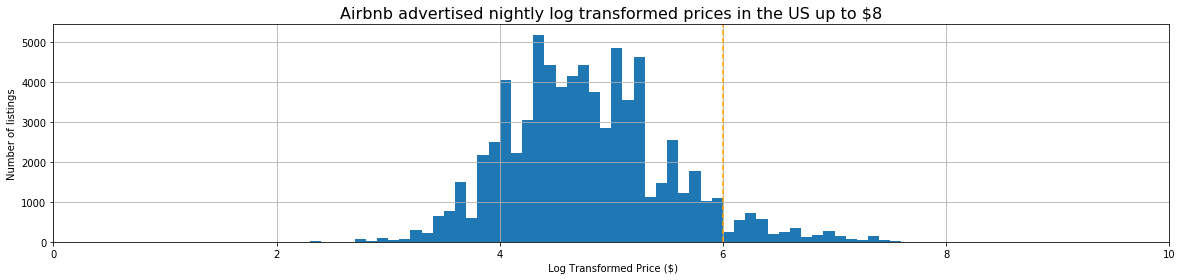

In [63]:
# Distribution of prices(log transformed) from $0 to $8
plt.figure(figsize=(20,4))
df.log_price.hist(bins=100, range=(0,10))
plt.margins(x=0)
plt.axvline(6, color='orange', linestyle='--')
plt.title("Airbnb advertised nightly log transformed prices in the US up to $8", fontsize=16)
plt.xlabel(" Log Transformed Price ($)")
plt.ylabel("Number of listings")
plt.show()

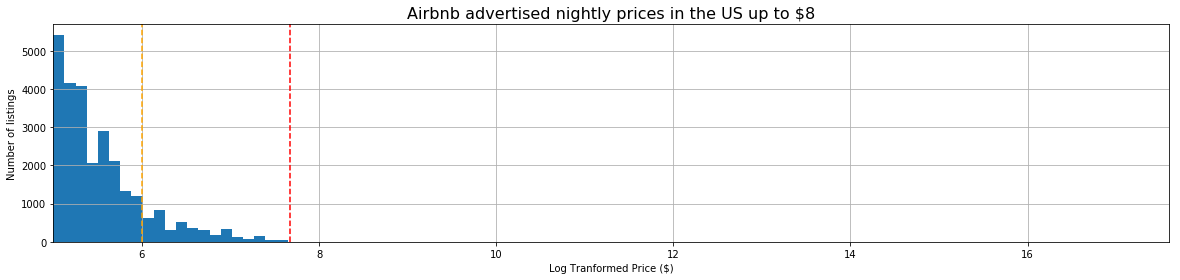

In [64]:
# Distribution of log transformed prices from $6 upwards
plt.figure(figsize=(20,4))
df.log_price.hist(bins=100, range=(5, max(df.log_price)+10))
plt.margins(x=0)
plt.axvline(6, color='orange', linestyle='--')
plt.axvline(7.675, color='red', linestyle='--')
plt.title("Airbnb advertised nightly prices in the US up to $8", fontsize=16)
plt.xlabel("Log Tranformed Price ($)")
plt.ylabel("Number of listings")
plt.show()

In [65]:
# Replacing outliers
df.loc[df.log_price <= 2.3, 'log_price'] = 2.3

# Replacing outliers
df.loc[df.log_price >= 7.6, 'log_price'] = 7.6

**accomodates, bathrooms, bedrooms and beds**

*Question: what are the average number of people accommodated, bathrooms, bedrooms and beds in Airbnb listings, and how do prices differ?*

Answer: the most common property setup sleeps two people in one bed in one bedroom, with one bathroom. Unsurprisingly, properties that accommodate more people achieve noticeably higher nightly rates, with diminishing returns coming after about 10 people.

Some properties have very high looking values for some features (e.g. one property claims to have 17 bathrooms), but these will be left for now in the interests of time (as double-checking them would be time-consuming).

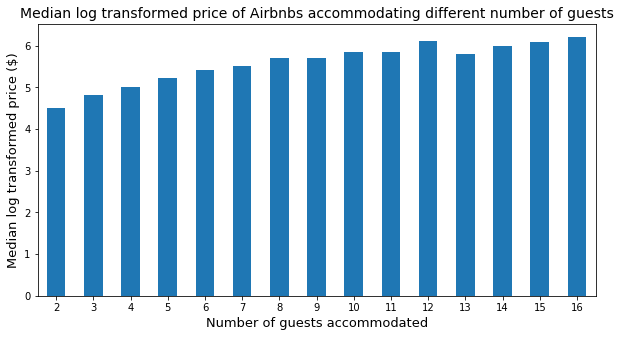

In [66]:
plt.figure(figsize=(10,5))
df.groupby('accommodates').log_price.median().plot(kind='bar')
plt.title('Median log transformed price of Airbnbs accommodating different number of guests', fontsize=14)
plt.xlabel('Number of guests accommodated', fontsize=13)
plt.ylabel('Median log transformed price ($)', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

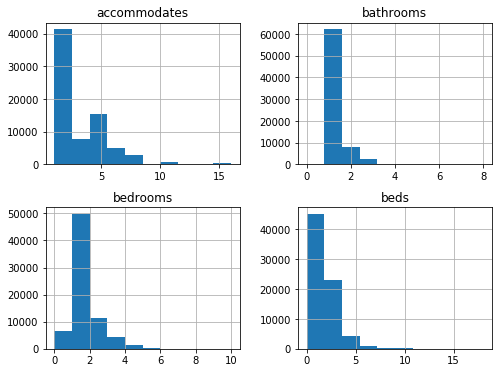

In [67]:
df[['accommodates', 'bathrooms', 'bedrooms', 'beds']].hist(figsize=(8,6));

**property, room_type**

*Question: what are the most common property and room types?*

Answer: about 70% of properties are apartments. The remainder are houses or more uncommon property types (e.g. 'bed and breakfast' or 'yurt').

About 55% of listings are entire homes (i.e. you are renting the entire property on your own). Most of the remainder are private rooms (i.e. you are renting a bedroom and possibly also a bathroom, but there will be other people in the property). Fewer than 1% are shared rooms (i.e. you are sharing a room with either the property owner or other guests).

In [68]:
def category_count_plot(col, figsize=(8,4)):
    """
    Plots a simple bar chart of the total count for each category in the column specified.
    A figure size can optionally be specified.
    """
    plt.figure(figsize=figsize)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=0)
    plt.show()

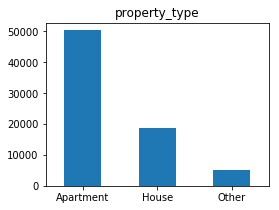

Apartment    0.678289
House        0.253056
Other        0.068655
Name: property_type, dtype: float64


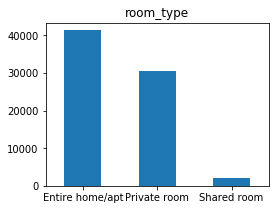

Entire home/apt    0.557415
Private room       0.413412
Shared room        0.029173
Name: room_type, dtype: float64


In [69]:
for col in ['property_type', 'room_type']:
    category_count_plot(col, figsize=(4,3))
    print(df[col].value_counts(normalize=True))

**Reviews**

*Question: what is the distribution of reviews like?*

Answer: for  every review category, the majority of listings that have had a review have received a 10/10 rating for that category (or 95-100/100 overall) - clearly people love their Airbnbs. Ratings or 8 or below are rare. Guests seem to be most positive about communication, check-ins and accuracy. As noted previously, about a quarter of listings have not yet been reviewed.

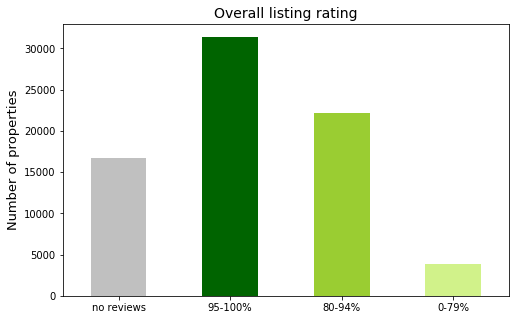

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))
ax.set_title('Overall listing rating', fontsize=14)
df['review_scores_rating'].value_counts().sort_index(ascending=False).plot(kind='bar', color=['silver', 'darkgreen', 'yellowgreen', '#d1f28a' ], ax=ax)
ax.set_xticklabels(labels=['no reviews', '95-100%', '80-94%', '0-79%'], rotation=0)
ax.set_xlabel('')
ax.set_ylabel('Number of properties', fontsize=13)
plt.show()

**First and Last reviews**

*Question: how long have listings been on the site, and how many listings have been reviewed recently?*

Answer: the most common time period in which currently live Airbnb listings had their first review is 2-3 years. This means that a lot of listings on the site have been active for at least a couple of years. Relatively few have been active for more than four years, however.

The most common category for the time since a listing received its last review is 2-8 weeks. This means that a lot of listings have been reviewed relatively recently. However, there are still over 10,000 listings which have not had a review for more than a year. The majority of these are probably what are sometimes referred to 'inactive' listings, because although they are technically live on the site, they do not have their calendards open and are not available to book.

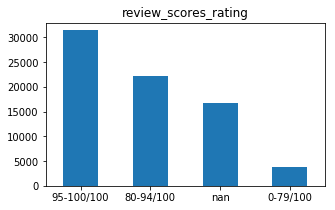

In [71]:
for col in list(df.columns[df.columns.str.startswith("review_scores") == True]):
    category_count_plot(col, figsize=(5,3))

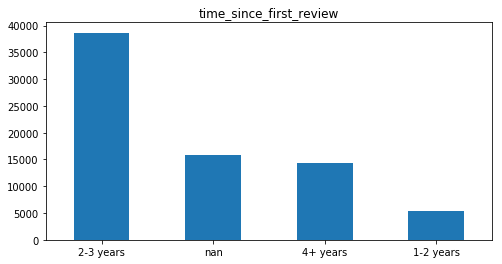

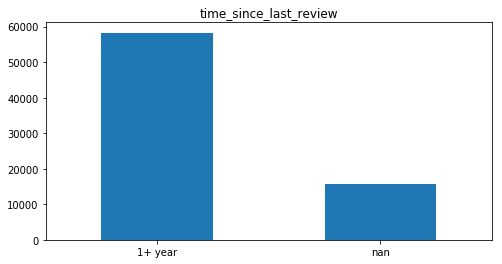

In [72]:
for col in ['time_since_first_review', 'time_since_last_review']:
    category_count_plot(col)

### Boolean (True or False features)

Many features (e.g. for amenities) can be true or false. This section compares the proportions of these features that are true or false (to explore the data and also to ascertain whether the feature is worth retaining), and the median price of each category (to explore the relationship between the category and price).

In [73]:
def binary_count_and_price_plot(col, figsize=(8,3)):
    """
    Plots a simple bar chart of the counts of true and false categories in the column specified,
    next to a bar chart of the median price for each category.
    A figure size can optionally be specified.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(col, fontsize=16, y=1)
    plt.subplots_adjust(top=0.80) # So that the suptitle does not overlap with the ax plot titles
    
    df.groupby(col).size().plot(kind='bar', ax=ax1, color=['firebrick', 'seagreen'])
    ax1.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax1.set_title('Category count')
    ax1.set_xlabel('')
    
    df.groupby(col).log_price.median().plot(kind='bar', ax=ax2, color=['firebrick', 'seagreen'])
    ax2.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax2.set_title('Median log transformed price ($)')
    ax2.set_xlabel('')
    
    plt.show()

**Host Verification**

*Question: how many hosts are verified, and is it worth it? (a question often asked by hosts)*

Answer: only about 33% of hosts are verified (e.g. by providing ID and verifying your phone number and email address), although it is something that hosts often think they are expected to do. Interestingly, however, despite the fact that one might expect the additional trust commanded by verified hosts to result in higher nightly prices, there is no discernable difference between the median nightly prices of listings with verified and unverified hosts. This column will be left in the dataframe, however, in case it has any useful interactions with other features.

In [74]:
df.host_identity_verified.value_counts(normalize=True)

1.0    0.671272
0.0    0.328728
Name: host_identity_verified, dtype: float64

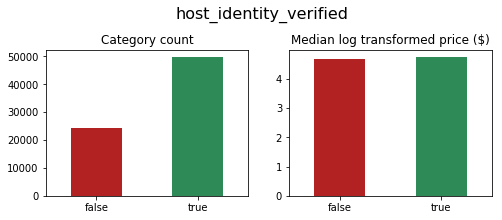

In [75]:
binary_count_and_price_plot('host_identity_verified')

**Instant Booking**

*Question: how many properties are instant bookable (i.e. able to be booked without messaging the host first), and is it worth it?*

Answer: only about 25% of properties are instant bookable. However, the added convenience does not seem to have any effect on the median price per night.

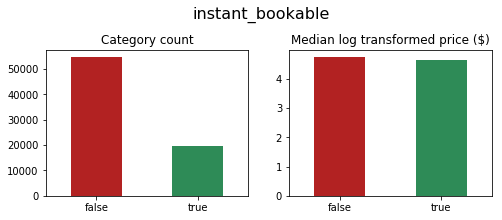

0    0.737552
1    0.262448
Name: instant_bookable, dtype: float64


In [76]:
binary_count_and_price_plot('instant_bookable')
print(df.instant_bookable.value_counts(normalize=True))

*Question: which amenities are common, and which increase the price of an Airbnb listing?*

Answer: amenities can be split into four main groups:

Uncommon, but properties with it have a higher median price:
- Balcony
- Bed linen
- Coffee machine
- Basic cooking equipment
- Elevator
- Child friendly
- Outdoor space
- Long term stays allowed
- Private entrance
- Safe or security system
- Self check-in

Most properties have it, and properties with it have a higher median price:
- TV
- Washer, dryer and/or dishwasher

Most properties have it, and there is no major difference in price between properties with and without it:
- Internet

Uncommon, and properties with it have a lower median price:
- Breakfast (probably because these are bed & breakfasts and therefore single rooms rather than entire homes)
- Parking (presumably because these are less likely to be central properties)
- Greeted by host (surprisingly!)
- Pets allowed

The takeaway from this is that there are some things that Airbnb hosts can do to try and improve their listing's price, although there is often not a simple causative relationship (e.g. having a parking space might improve your price, but listings with parking spaces are cheaper on average because they are less likely to be in central London, and location is a more important factor than parking space):
- **Make sure you have the necessities that your competitors also have**, e.g. internet, a TV and white goods (a washer, dryer and/or dishwasher).
- If you can, **include some extras to make your property stand out and achieve a higher price**. For example, you could buy a coffee machine, allow self check-in and long-term stays, and make your property child-friendly.
- **Avoid pets** as the additional wear and tear to your property might harm its financial performance.


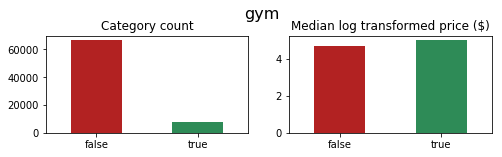

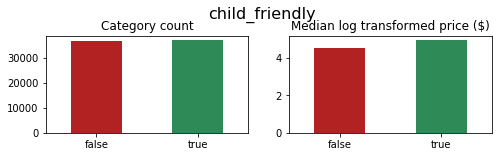

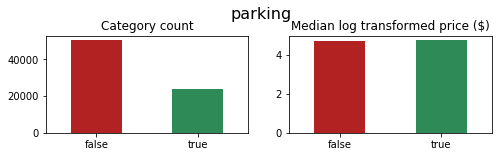

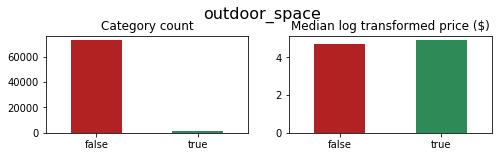

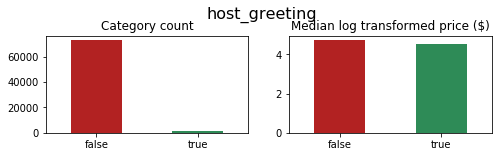

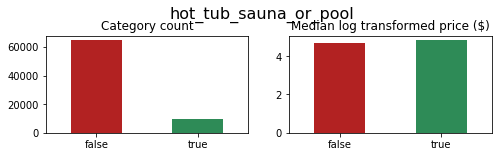

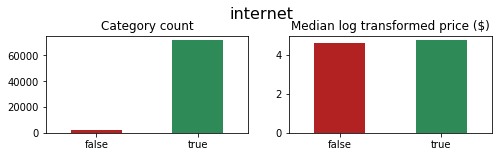

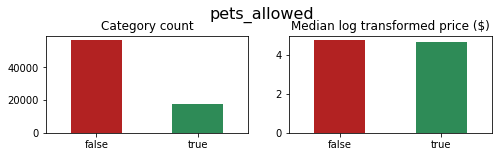

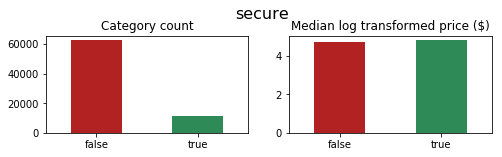

In [77]:
for col in df.iloc[:,31:-2].columns:
    binary_count_and_price_plot(col, figsize=(8,2))

## Phase 3: Preparing the data for modelling

**Dropping columns and assessing multi-collinearity**

Categorical variables will now be one-hot encoded:

In [78]:
transformed_df = pd.get_dummies(df)

In [79]:
transformed_df.columns

Index(['log_price', 'accommodates', 'bathrooms', 'cleaning_fee',
       'host_identity_verified', 'instant_bookable', 'number_of_reviews',
       'bedrooms', 'beds', 'distance_to_center', 'host_days_active',
       'check_in_24h', 'air_conditioning', 'high_end_electronics', 'bbq',
       'balcony', 'nature_and_views', 'bed_linen', 'breakfast', 'tv',
       'coffee_machine', 'cooking_basics', 'white_goods', 'elevator', 'gym',
       'child_friendly', 'parking', 'outdoor_space', 'host_greeting',
       'hot_tub_sauna_or_pool', 'internet', 'pets_allowed', 'secure',
       'property_type_Apartment', 'property_type_House', 'property_type_Other',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'bed_type_Airbed', 'bed_type_Couch',
       'bed_type_Futon', 'bed_type_Pull-out Sofa', 'bed_type_Real Bed',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict', 'city_Boston', 'city_Chicago', 'city_DC'

In [80]:
transformed_df.shape

(74110, 68)

The dataset can now be assessed for multi-collinearity.

In [81]:
def multi_collinearity_heatmap(df, figsize=(11,9)):
    
    """
    Creates a heatmap of correlations between features in the df. A figure size can optionally be set.
    """
    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());

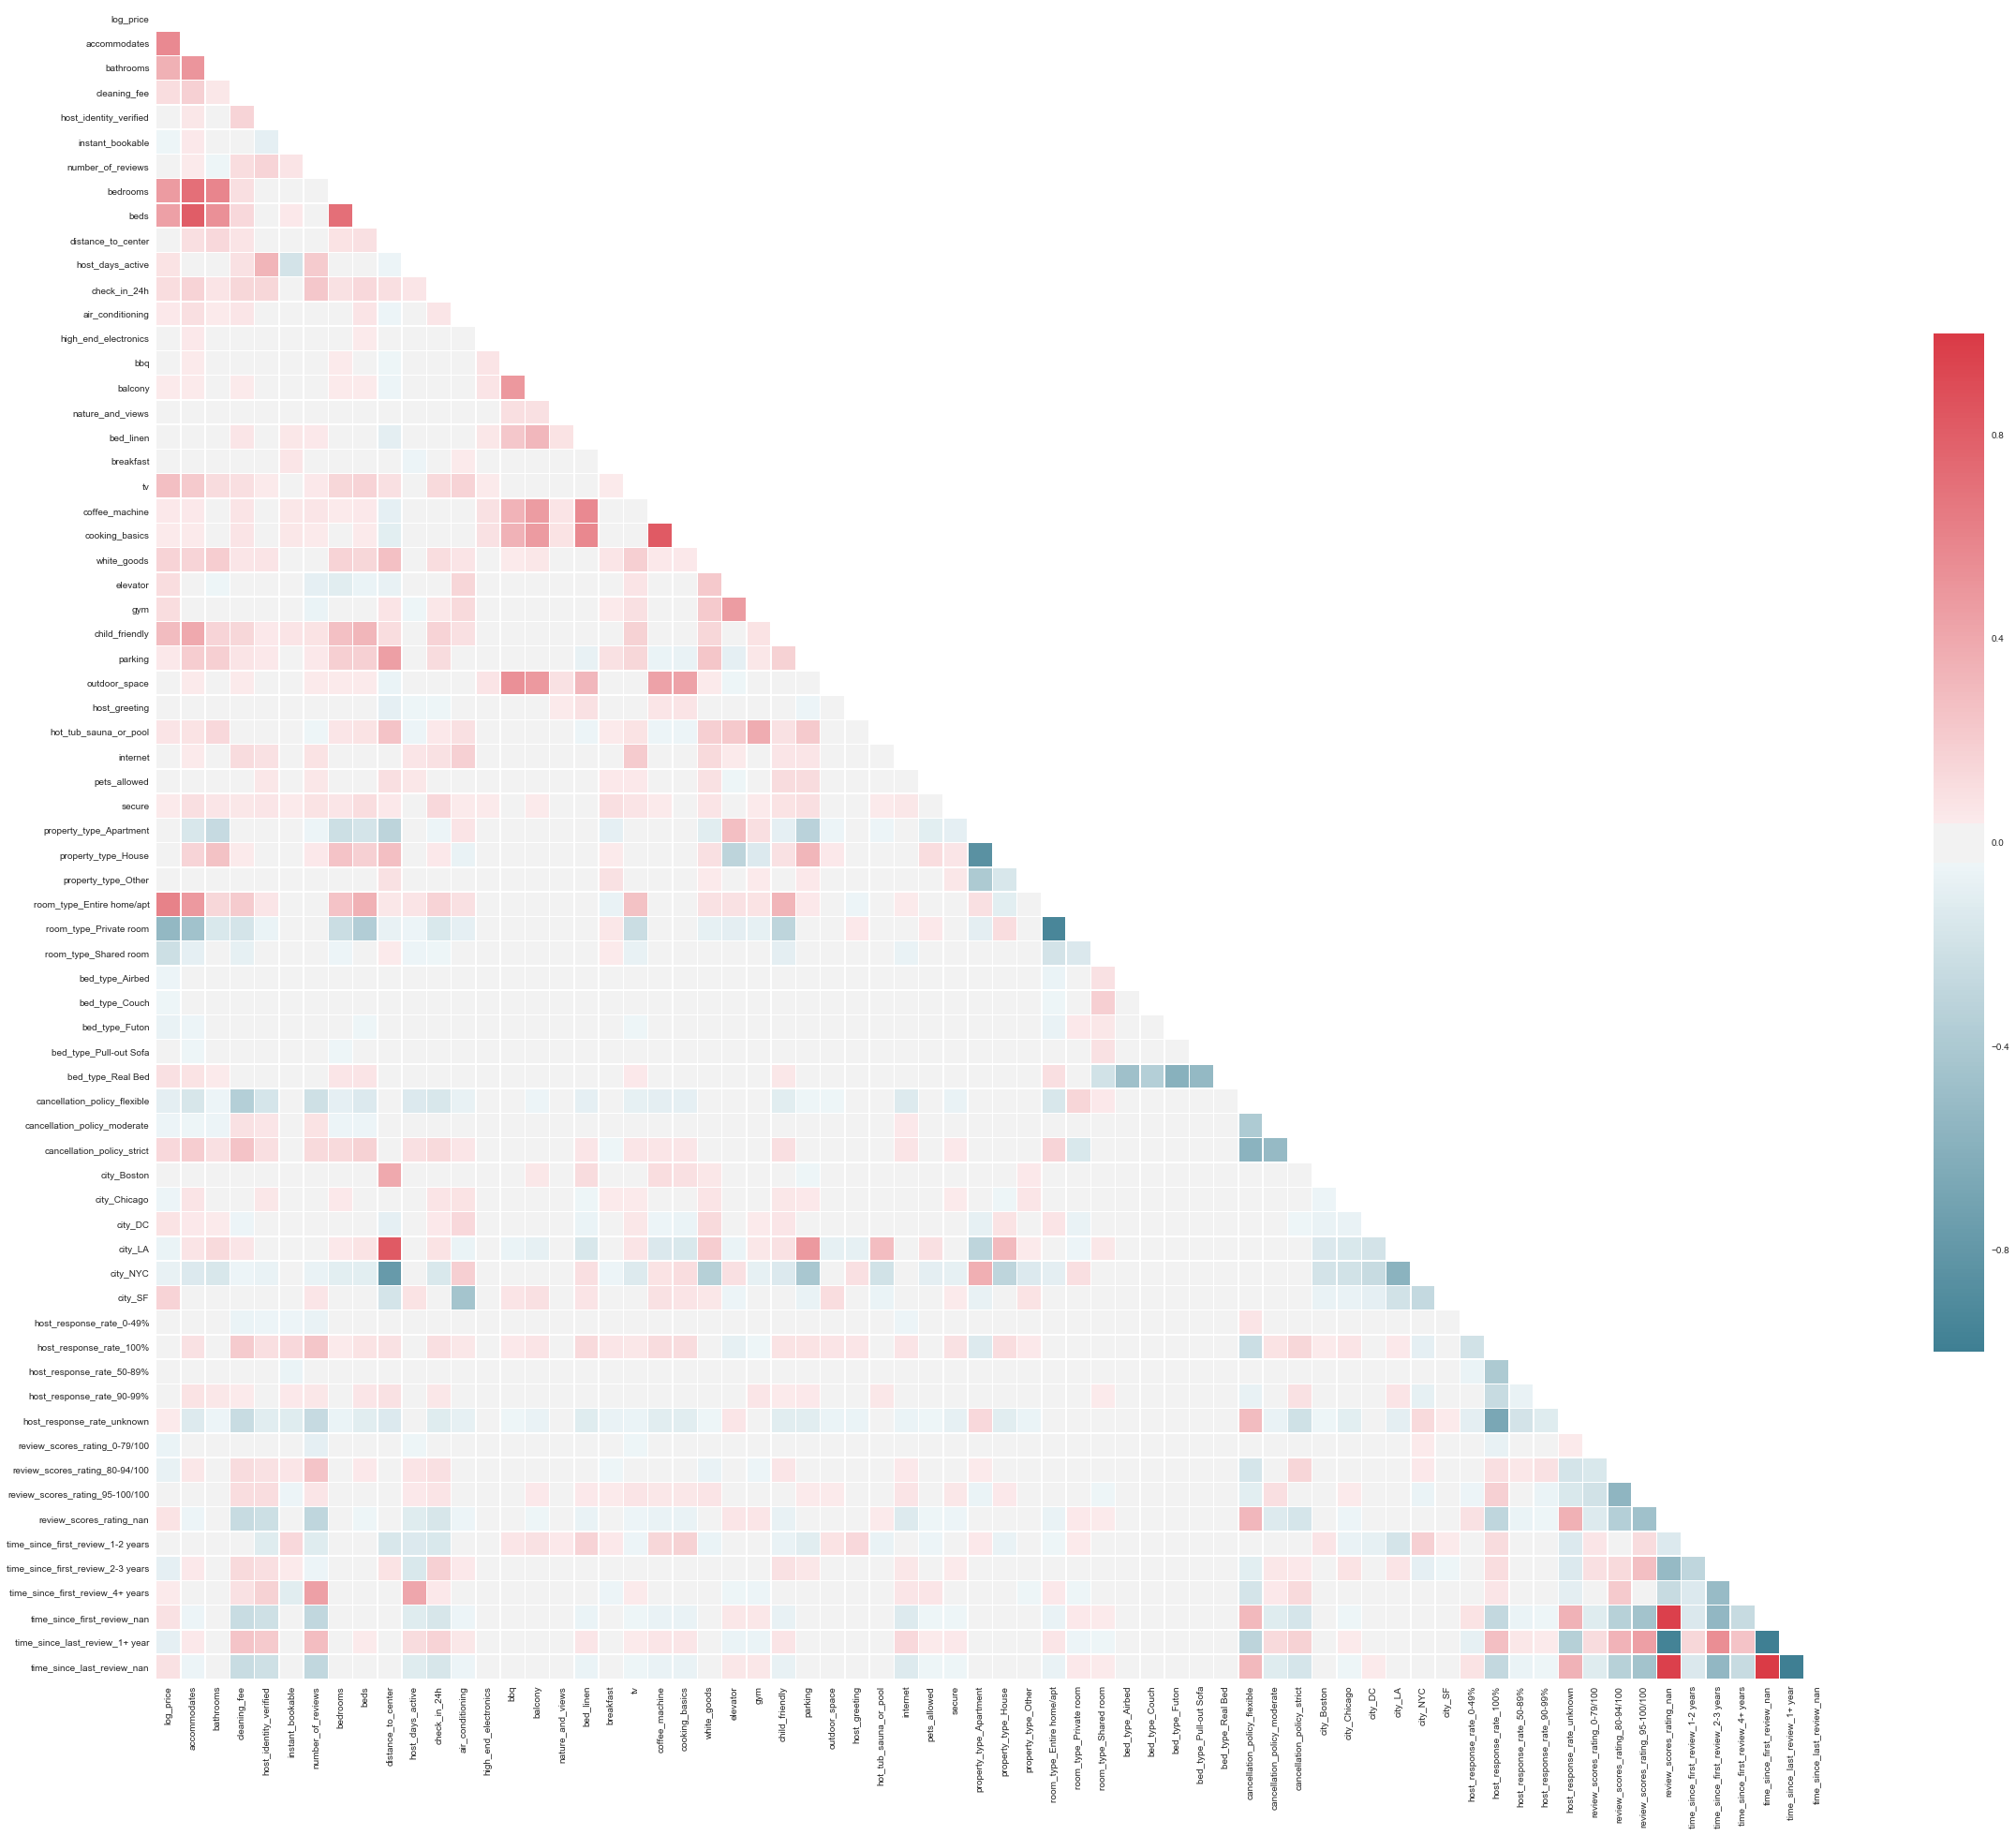

In [82]:
multi_collinearity_heatmap(transformed_df, figsize=(40,40))

Areas of multi-collinearity:

- Beds, bedrooms, guests included and the number of people that a property accommodates are highly correlated. The number of people accommodated has traditionally been a more high priority search parameter on Airbnb, as it is more relevant for private and shared rooms than the number of bedrooms (and is still the second highest priority parameter when searching on the site, after dates (when read from left to right on the search page)).
- Unsurprisingly, there are perfect correlations between NaN reviews (i.e. listings that are not reviewed yet) for different review categories, and first and last review times. NaN categories can therefore be dropped.
- There are strong negative correlations between houses and apartments, and between private rooms and entire homes (as these were the main two categories of their features before they were one-hot encoded). Although these are important categories, one of each will be dropped in order to reduce multi-collinearity (apartments and private rooms, as these are the second most common categories).

In [83]:
# Dropping collinear features
to_drop = ['beds',
           'bedrooms',
           'property_type_Apartment',
           'room_type_Private room']
to_drop.extend(list(transformed_df.columns[transformed_df.columns.str.endswith('nan')]))

transformed_df.drop(to_drop, axis=1, inplace=True)

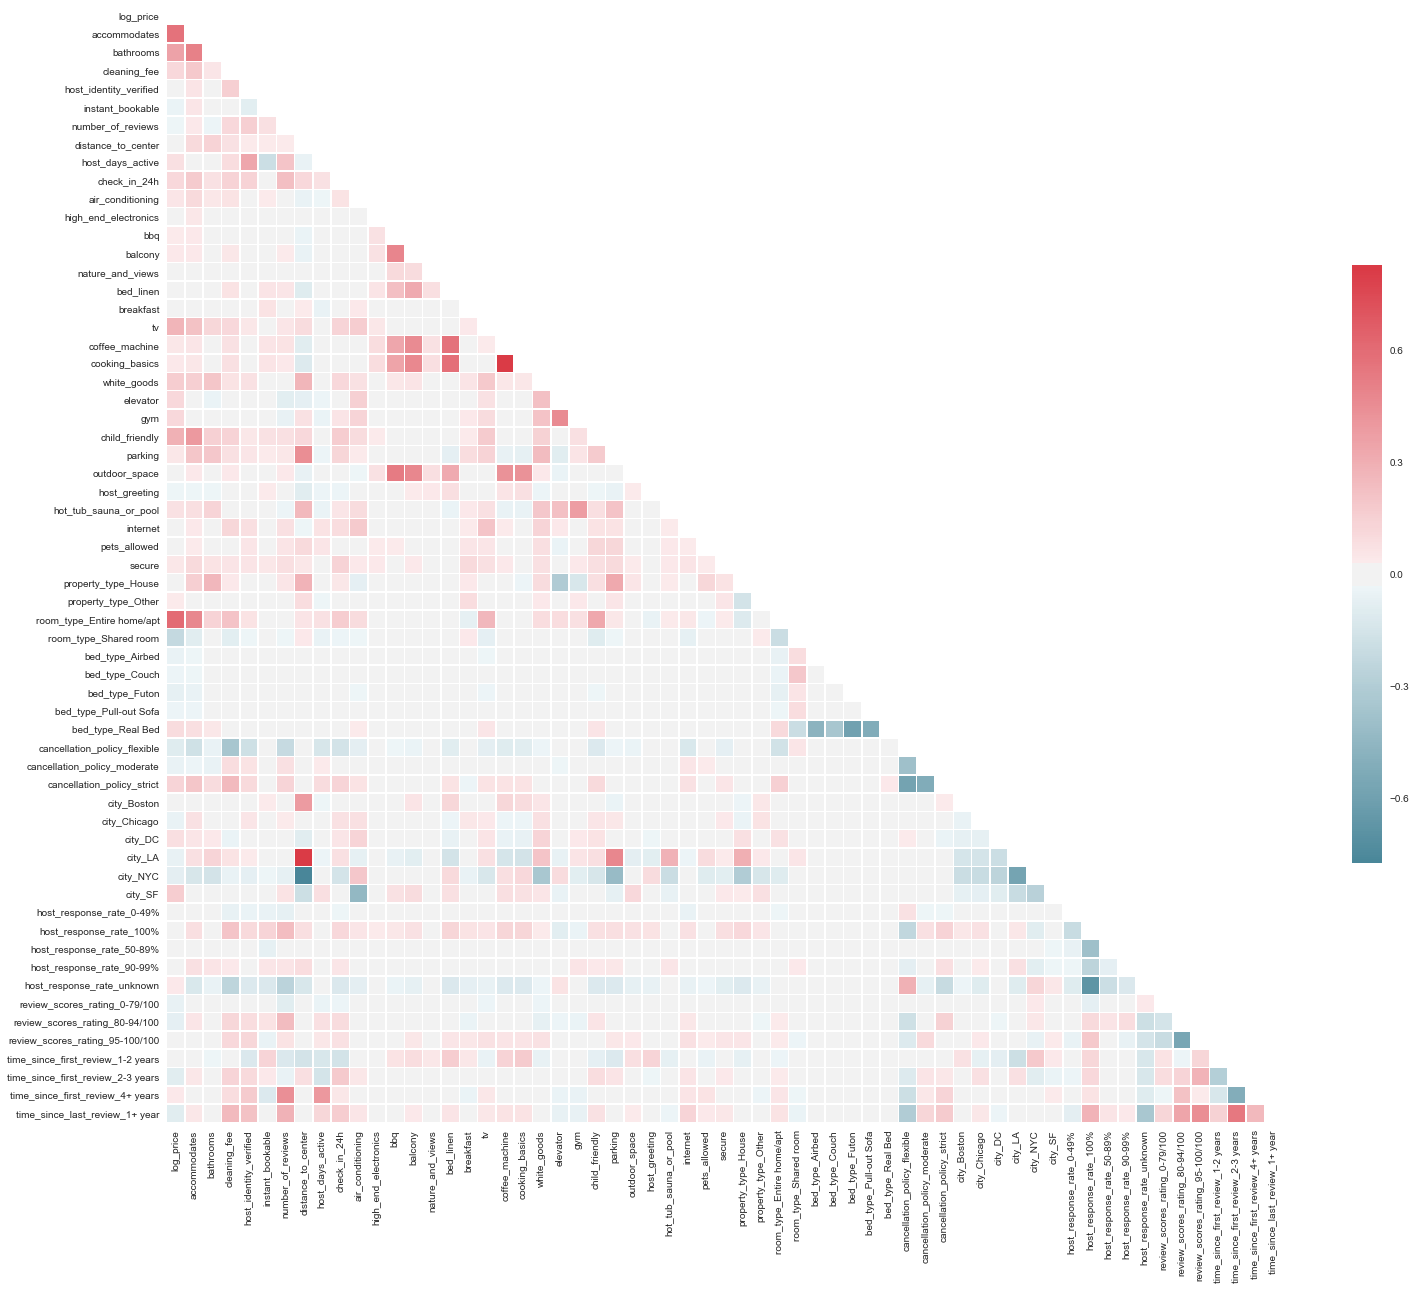

In [84]:
# Final assessment of multi-collinearity
multi_collinearity_heatmap(transformed_df.drop(list(transformed_df.columns[transformed_df.columns.str.startswith('borough')]), axis=1), figsize=(25,22))

There are still some fairly strong correlations between highly rated properties of different reviews categories - i.e. if a property gets a 10/10 for one category, it is likely to get a 10/10 for other categories. However, these will be left in for now and can be experimented with later to see if removing them improves the model.

**Standardising and Normalising**

Other than  host_days_active, the remaining numerical features are all postively skewed and could benefit from log transformation.

In [85]:
numerical_columns = ['accommodates', 'bathrooms', 'number_of_reviews', 'host_days_active', 'log_price']

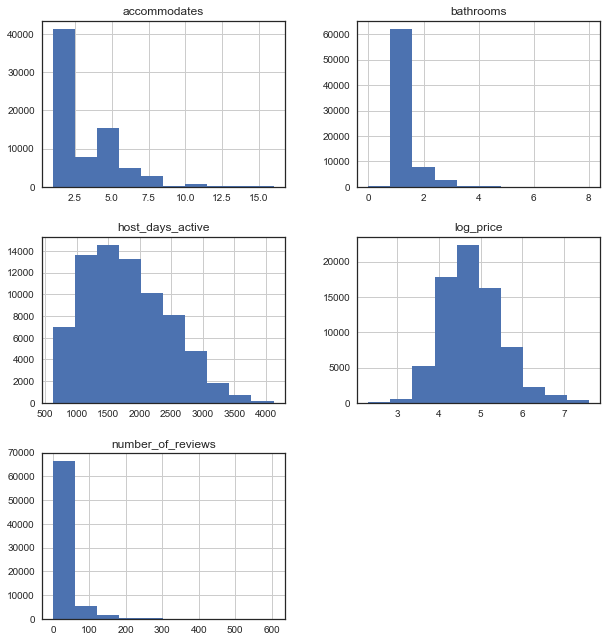

In [86]:
transformed_df[numerical_columns].hist(figsize=(10,11));

In [87]:
# Log transforming columns
numerical_columns = [i for i in numerical_columns if i not in ['log_price', 'host_days_active']] # Removing items not to be transformed

for col in numerical_columns:
    transformed_df[col] = transformed_df[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    transformed_df[col] = np.log(transformed_df[col])

This appears to have helped some of the distributions, although some (e.g. cleaning fee, extra people fee and security fee) contain a large number of 0s, which means these features are not normally distributed. Most importantly, however, the target variable price appears much more normally distributed.

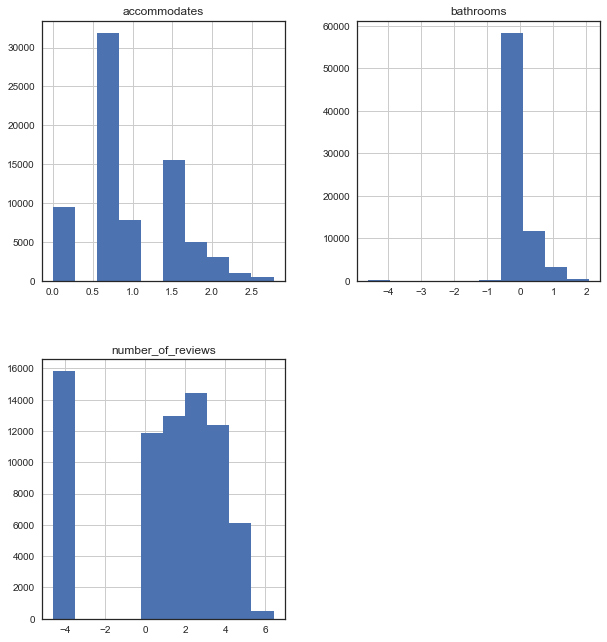

In [88]:
transformed_df[numerical_columns].hist(figsize=(10,11));

Finally, the predictive features X and the target feature y can be separated, and X will be scaled. StandardScaler from sklearn will be used, but the type of scaling used could be experimented with later to see if alternative versions yield better results.

In [89]:
# Separating X and y
X = transformed_df.drop(['log_price'], axis=1)
y = transformed_df.log_price

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

## Phase 4: Building predictive models

In this section several machine learning and deep learning models will be built in order to predict an Airbnb listing's price.

The evaluation metrics used will be mean squared error (for loss) and r squared (for accuracy).

In [90]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=123)

### Model 1: XGBoost

Before building a neural network, a vanilla XGBoost model will be used to predict price, in order to provide a baseline level of accuracy and a measure of feature importance. This most likely provides the best achievable accuracy using machine learning models (other than possible small accuracy increases from hyper-parameter tuning) due to XGBoost's superior performance.

In [91]:
xgb_reg_start = time.time()

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

xgb_reg_end = time.time()

print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

Time taken to run: 0.3 minutes

Training MSE: 0.1738
Validation MSE: 0.1791

Training r2: 0.661
Validation r2: 0.6577


In [92]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

,weight
secure,0.000000
bed_type_Couch,0.000000
bed_type_Airbed,0.000000
bed_type_Real Bed,0.000000
cancellation_policy_moderate,0.000000
pets_allowed,0.000000
city_Boston,0.000000
host_greeting,0.000000
outdoor_space,0.000000
city_NYC,0.000000


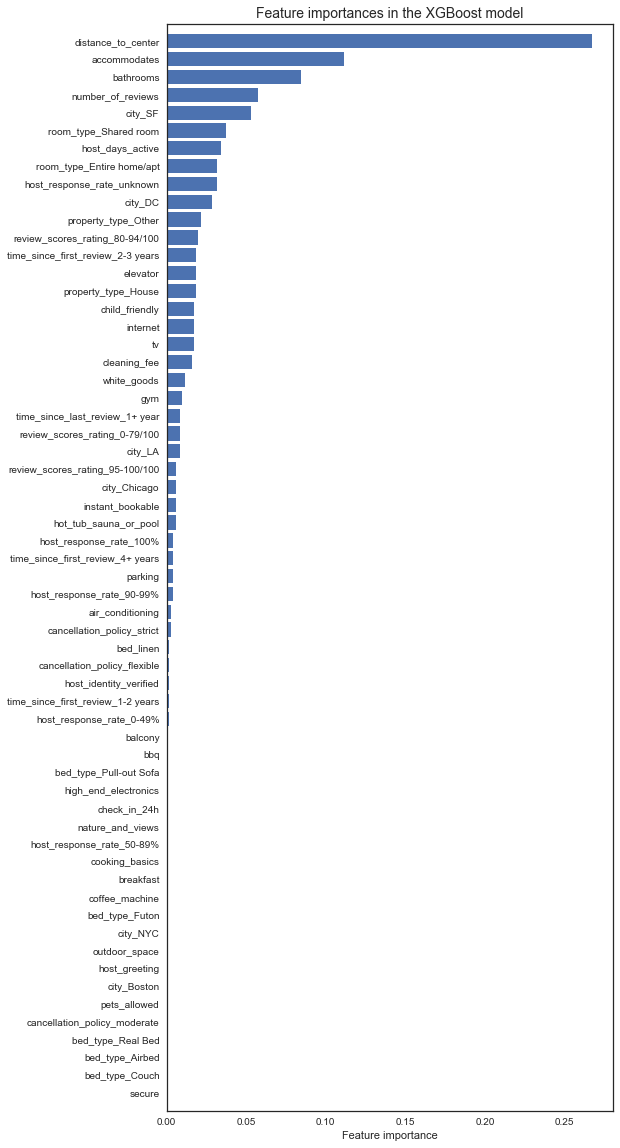

In [93]:
# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

About a third of features have a feature importance of 0 in this XGBoost regression model, and could potentially be removed (although they will not be for the deep learning modeling part of this project, as they may have interactions with other features).

**Some of the most important features are:**
- How many people the property accommodates
- The cleaning fee
- Distance of the property from the city center
- Bedrroms
- The number of reviews
- The number of bathrooms
- If the property is in San Fransico
- The minimum nights stay
- How long has the host been active
- If the room is sharable

Firstly, it is not at all surprising that the distance of the property from the city center is THE most importnat feature. It is obvious that a property in Beverly Hills will be significantly pricier than a property in downtown LA.

It is also not surprising that the 2nd most important feature is how many people the property accommodates, as that's one of the main things you would use to search for properties with in the first place. It is also not surprising that features related to reviews are in the top ten.

It is also notable that **the other fee types - cleaning - make the top 10 feature list**. It is likely that these are positive relationships, and that when a host sets a higher price for the nightly stay they are also likely to set other prices high.

### Model 2: Three layer Neural Network

For the initial version of the neural network, a relatively shallow three layer NN will be created. It will consist of densely-connected layers, and use a relu activation function for the hidden layers and a linear activation function for the output layer, as it is being used for a regression task. The loss function will be mean squared error (again, because this is for regression).

In [94]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               7808      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 106,881
Trainable params: 106,881
Non-trainable params: 0
_________________________________________________________________
None


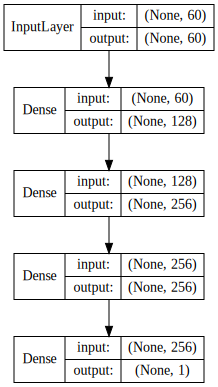

In [95]:
# Building the model
nn2 = models.Sequential()
nn2.add(layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn2.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(nn2.summary())

# Visualising the neural network
SVG(model_to_dot(nn2, show_layer_names=False, show_shapes=True).create(prog='dot', format='svg'))

In [96]:
# Training the model
nn2_start = time.time()

nn2_history = nn2.fit(X_train,
                  y_train,
                  epochs=100,
                  batch_size=256,
                  validation_split = 0.1)

nn2_end = time.time()

print(f"Time taken to run: {round((nn2_end - nn2_start)/60,1)} minutes")

Instructions for updating:
Use tf.cast instead.
Train on 56693 samples, validate on 6300 samples
Epoch 1/100
56693/56693 [==============================] - 2s 30us/step - loss: 0.7821 - mean_squared_error: 0.7821 - val_loss: 0.2306 - val_mean_squared_error: 0.2306
Epoch 2/100
56693/56693 [==============================] - 1s 25us/step - loss: 0.2226 - mean_squared_error: 0.2226 - val_loss: 0.2118 - val_mean_squared_error: 0.2118
Epoch 3/100
56693/56693 [==============================] - 1s 24us/step - loss: 0.2070 - mean_squared_error: 0.2070 - val_loss: 0.2047 - val_mean_squared_error: 0.2047
Epoch 4/100
56693/56693 [==============================] - 1s 25us/step - loss: 0.1991 - mean_squared_error: 0.1991 - val_loss: 0.2018 - val_mean_squared_error: 0.2018
Epoch 5/100
56693/56693 [==============================] - 1s 25us/step - loss: 0.1936 - mean_squared_error: 0.1936 - val_loss: 0.1973 - val_mean_squared_error: 0.1973
Epoch 6/100
56693/56693 [==============================] - 2s 2

56693/56693 [==============================] - 1s 20us/step - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.2578 - val_mean_squared_error: 0.2578
Epoch 48/100
56693/56693 [==============================] - 1s 26us/step - loss: 0.0752 - mean_squared_error: 0.0752 - val_loss: 0.2555 - val_mean_squared_error: 0.2555
Epoch 49/100
56693/56693 [==============================] - 2s 28us/step - loss: 0.0747 - mean_squared_error: 0.0747 - val_loss: 0.2709 - val_mean_squared_error: 0.2709
Epoch 50/100
56693/56693 [==============================] - 1s 24us/step - loss: 0.0737 - mean_squared_error: 0.0737 - val_loss: 0.2526 - val_mean_squared_error: 0.2526
Epoch 51/100
56693/56693 [==============================] - 2s 27us/step - loss: 0.0721 - mean_squared_error: 0.0721 - val_loss: 0.2554 - val_mean_squared_error: 0.2554
Epoch 52/100
56693/56693 [==============================] - 1s 21us/step - loss: 0.0698 - mean_squared_error: 0.0698 - val_loss: 0.2511 - val_mean_squared_error: 0.2511

56693/56693 [==============================] - 1s 23us/step - loss: 0.0385 - mean_squared_error: 0.0385 - val_loss: 0.2862 - val_mean_squared_error: 0.2862
Epoch 96/100
56693/56693 [==============================] - 1s 23us/step - loss: 0.0370 - mean_squared_error: 0.0370 - val_loss: 0.2875 - val_mean_squared_error: 0.2875
Epoch 97/100
56693/56693 [==============================] - 1s 23us/step - loss: 0.0383 - mean_squared_error: 0.0383 - val_loss: 0.2888 - val_mean_squared_error: 0.2888
Epoch 98/100
56693/56693 [==============================] - 1s 23us/step - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.2877 - val_mean_squared_error: 0.2877
Epoch 99/100
56693/56693 [==============================] - 1s 25us/step - loss: 0.0381 - mean_squared_error: 0.0381 - val_loss: 0.2894 - val_mean_squared_error: 0.2894
Epoch 100/100
56693/56693 [==============================] - 1s 23us/step - loss: 0.0374 - mean_squared_error: 0.0374 - val_loss: 0.2970 - val_mean_squared_error: 0.297

In [97]:
# from keras.callbacks import History 
# history = History()

In [98]:
def nn_model_evaluation(model, nn_history, skip_epochs=0, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    """
    For a given neural network model that has already been fit, prints for the train and tests sets the MSE and r squared
    values, a line graph of the loss in each epoch, and a scatterplot of predicted vs. actual values with a line
    representing where predicted = actual values. Optionally, a value for skip_epoch can be provided, which skips that
    number of epochs in the line graph of losses (useful in cases where the loss in the first epoch is orders of magnitude
    larger than subsequent epochs). Training and test sets can also optionally be specified.
    """

    # MSE and r squared values
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
    print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
    print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
    print("Validation r2:", round(r2_score(y_test, y_test_pred),4))
    
    # Line graph of losses
    model_results = nn_history.history
    plt.plot(list(range((skip_epochs+1),len(model_results['loss'])+1)), model_results['loss'][skip_epochs:], label='Train')
    plt.plot(list(range((skip_epochs+1),len(model_results['val_loss'])+1)), model_results['val_loss'][skip_epochs:], label='Test', color='green')
    plt.legend()
    plt.title('Training and test loss at each epoch', fontsize=14)
    plt.show()
    
    # Scatterplot of predicted vs. actual values
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle('Predicted vs. actual values', fontsize=14, y=1)
    plt.subplots_adjust(top=0.93, wspace=0)
    
    ax1.scatter(y_test, y_test_pred, s=2, alpha=0.7)
    ax1.plot(list(range(2,8)), list(range(2,8)), color='black', linestyle='--')
    ax1.set_title('Test set')
    ax1.set_xlabel('Actual values')
    ax1.set_ylabel('Predicted values')
    
    ax2.scatter(y_train, y_train_pred, s=2, alpha=0.7)
    ax2.plot(list(range(2,8)), list(range(2,8)), color='black', linestyle='--')
    ax2.set_title('Train set')
    ax2.set_xlabel('Actual values')
    ax2.set_ylabel('')
    ax2.set_yticklabels(labels='')
    
    plt.show()

Training MSE: 0.0596
Validation MSE: 0.3116

Training r2: 0.8837
Validation r2: 0.4043


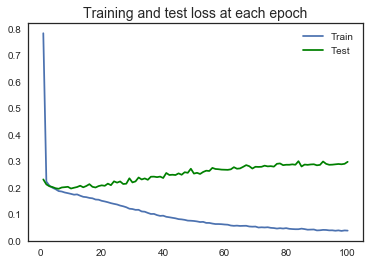

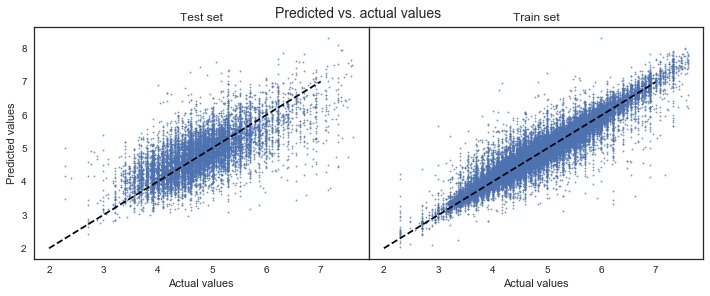

In [99]:
nn_model_evaluation(nn2,nn2_history)

Compared to the XGBoost model the neural network has performed worse. However, the training set had much better results in the neural network, indicating that OVERFITTING is an issue.

The line graph above highlights this point, showing the disparity between the train and test set MSE at each epoch. The scatterplot above further highlights this point, demonstrating that the values cluster more closely to a line form for the training set.

Further iterations on the model will attempt to reduce overfitting.

### Model 3: four-layer neural network with L1 regularization and more epochs

To try and reduce over-fitting, L1 regularization will be used. This acts to reduce parameter coefficients (or potentially remove them altogether by setting the coefficient to zero) in order to to reduce model complexity and overfitting. Unlike L2 regularization, L1 regularization performs penalised estimation and selection simultaneously, and so is preferred when the number of predictors is very high.

An extra layer will also be added, to see whether it is able to increase model accuracy (r2).

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               7808      
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 513       
Total params: 238,721
Trainable params: 238,721
Non-trainable params: 0
_________________________________________________________________
None


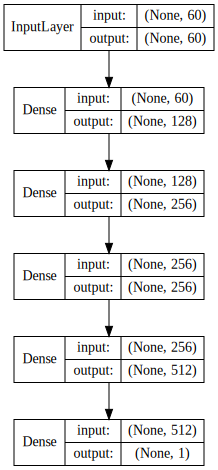

In [100]:
# Building the model
nn3 = models.Sequential()
nn3.add(layers.Dense(128, input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn3.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn3.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn3.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn3.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn3.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(nn3.summary())

# Visualising the neural network
SVG(model_to_dot(nn3, show_layer_names=False, show_shapes=True).create(prog='dot', format='svg'))

In [101]:
# Training the model
nn3_start = time.time()

nn3_history = nn3.fit(X_train,
                  y_train,
                  epochs=150,
                  batch_size=256,
                  validation_split = 0.1)

nn3_end = time.time()

print(f"Time taken to run: {round((nn3_end - nn3_start)/60,1)} minutes")

Train on 56693 samples, validate on 6300 samples
Epoch 1/150
56693/56693 [==============================] - 3s 58us/step - loss: 24.2851 - mean_squared_error: 0.7724 - val_loss: 7.1412 - val_mean_squared_error: 0.2222
Epoch 2/150
56693/56693 [==============================] - 3s 54us/step - loss: 3.6265 - mean_squared_error: 0.2153 - val_loss: 1.6179 - val_mean_squared_error: 0.2072
Epoch 3/150
56693/56693 [==============================] - 3s 60us/step - loss: 1.0191 - mean_squared_error: 0.2208 - val_loss: 0.6619 - val_mean_squared_error: 0.2144
Epoch 4/150
56693/56693 [==============================] - 3s 61us/step - loss: 0.5532 - mean_squared_error: 0.2187 - val_loss: 0.4791 - val_mean_squared_error: 0.2113
Epoch 5/150
56693/56693 [==============================] - 4s 64us/step - loss: 0.4556 - mean_squared_error: 0.2146 - val_loss: 0.4307 - val_mean_squared_error: 0.2073
Epoch 6/150
56693/56693 [==============================] - 3s 57us/step - loss: 0.4272 - mean_squared_error: 0

56693/56693 [==============================] - 3s 57us/step - loss: 0.3734 - mean_squared_error: 0.2044 - val_loss: 0.3626 - val_mean_squared_error: 0.1942
Epoch 50/150
56693/56693 [==============================] - 3s 56us/step - loss: 0.3726 - mean_squared_error: 0.2040 - val_loss: 0.3641 - val_mean_squared_error: 0.1960
Epoch 51/150
56693/56693 [==============================] - 3s 53us/step - loss: 0.3730 - mean_squared_error: 0.2044 - val_loss: 0.3630 - val_mean_squared_error: 0.1945
Epoch 52/150
56693/56693 [==============================] - 3s 49us/step - loss: 0.3734 - mean_squared_error: 0.2048 - val_loss: 0.3630 - val_mean_squared_error: 0.1946
Epoch 53/150
56693/56693 [==============================] - 3s 49us/step - loss: 0.3724 - mean_squared_error: 0.2042 - val_loss: 0.3640 - val_mean_squared_error: 0.1956
Epoch 54/150
56693/56693 [==============================] - 3s 51us/step - loss: 0.3725 - mean_squared_error: 0.2043 - val_loss: 0.3650 - val_mean_squared_error: 0.1965

56693/56693 [==============================] - 4s 62us/step - loss: 0.3694 - mean_squared_error: 0.2039 - val_loss: 0.3608 - val_mean_squared_error: 0.1955
Epoch 98/150
56693/56693 [==============================] - 3s 59us/step - loss: 0.3695 - mean_squared_error: 0.2042 - val_loss: 0.3608 - val_mean_squared_error: 0.1948
Epoch 99/150
56693/56693 [==============================] - 4s 62us/step - loss: 0.3695 - mean_squared_error: 0.2040 - val_loss: 0.3602 - val_mean_squared_error: 0.1948
Epoch 100/150
56693/56693 [==============================] - 4s 62us/step - loss: 0.3695 - mean_squared_error: 0.2043 - val_loss: 0.3629 - val_mean_squared_error: 0.1977
Epoch 101/150
56693/56693 [==============================] - 3s 58us/step - loss: 0.3694 - mean_squared_error: 0.2041 - val_loss: 0.3597 - val_mean_squared_error: 0.1946
Epoch 102/150
56693/56693 [==============================] - 3s 61us/step - loss: 0.3692 - mean_squared_error: 0.2039 - val_loss: 0.3598 - val_mean_squared_error: 0.1

56693/56693 [==============================] - 2s 39us/step - loss: 0.3673 - mean_squared_error: 0.2028 - val_loss: 0.3586 - val_mean_squared_error: 0.1944
Epoch 146/150
56693/56693 [==============================] - 2s 42us/step - loss: 0.3666 - mean_squared_error: 0.2021 - val_loss: 0.3579 - val_mean_squared_error: 0.1932
Epoch 147/150
56693/56693 [==============================] - 2s 40us/step - loss: 0.3673 - mean_squared_error: 0.2029 - val_loss: 0.3595 - val_mean_squared_error: 0.1949
Epoch 148/150
56693/56693 [==============================] - 2s 41us/step - loss: 0.3671 - mean_squared_error: 0.2028 - val_loss: 0.3591 - val_mean_squared_error: 0.1948
Epoch 149/150
56693/56693 [==============================] - 3s 48us/step - loss: 0.3672 - mean_squared_error: 0.2029 - val_loss: 0.3584 - val_mean_squared_error: 0.1939
Epoch 150/150
56693/56693 [==============================] - 3s 47us/step - loss: 0.3671 - mean_squared_error: 0.2027 - val_loss: 0.3573 - val_mean_squared_error: 0

Training MSE: 0.2005
Validation MSE: 0.2067

Training r2: 0.609
Validation r2: 0.6049


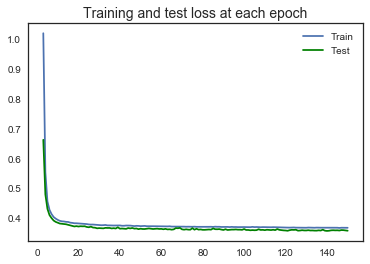

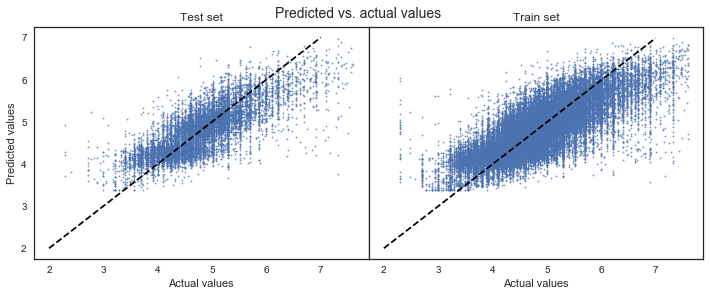

In [102]:
# Evaluating the model
nn_model_evaluation(nn3, nn3_history, skip_epochs=2)

### Neural network with SGD optimizer

This NN is mostly the same as model 3, but uses an SGD (stochastic gradient descent) optimizer instead of Adam.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               7808      
_________________________________________________________________
dense_11 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 513       
Total params: 238,721
Trainable params: 238,721
Non-trainable params: 0
_________________________________________________________________
None


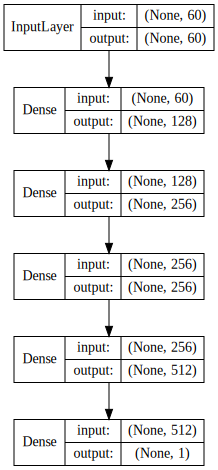

In [103]:
# Building the model
nn4 = models.Sequential()
nn4.add(layers.Dense(128, input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn4.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn4.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn4.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn4.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn4.compile(loss='mean_squared_error',
            optimizer='SGD',
            metrics=['mean_squared_error'])

# Model summary
print(nn4.summary())

# Visualising the neural network
SVG(model_to_dot(nn4, show_layer_names=False, show_shapes=True).create(prog='dot', format='svg'))

In [104]:
# Training the model
nn4_start = time.time()

nn4_history = nn4.fit(X_train,
                  y_train,
                  epochs=150,
                  batch_size=256,
                  validation_split = 0.1)

nn4_end = time.time()

print(f"Time taken to run: {round((nn4_end - nn4_start)/60,1)} minutes")

Train on 56693 samples, validate on 6300 samples
Epoch 1/150
56693/56693 [==============================] - 3s 45us/step - loss: 54.7885 - mean_squared_error: 0.5782 - val_loss: 48.3542 - val_mean_squared_error: 0.2674
Epoch 2/150
56693/56693 [==============================] - 2s 40us/step - loss: 42.7930 - mean_squared_error: 0.2535 - val_loss: 37.3953 - val_mean_squared_error: 0.2307
Epoch 3/150
56693/56693 [==============================] - 2s 39us/step - loss: 32.5835 - mean_squared_error: 0.2289 - val_loss: 27.9451 - val_mean_squared_error: 0.2145
Epoch 4/150
56693/56693 [==============================] - 2s 39us/step - loss: 23.8757 - mean_squared_error: 0.2182 - val_loss: 19.9915 - val_mean_squared_error: 0.2126
Epoch 5/150
56693/56693 [==============================] - 2s 38us/step - loss: 16.6582 - mean_squared_error: 0.2137 - val_loss: 13.5180 - val_mean_squared_error: 0.2058
Epoch 6/150
56693/56693 [==============================] - 2s 39us/step - loss: 10.9277 - mean_square

56693/56693 [==============================] - 2s 38us/step - loss: 0.2825 - mean_squared_error: 0.2073 - val_loss: 0.2762 - val_mean_squared_error: 0.2002
Epoch 50/150
56693/56693 [==============================] - 2s 37us/step - loss: 0.2824 - mean_squared_error: 0.2073 - val_loss: 0.2770 - val_mean_squared_error: 0.2016
Epoch 51/150
56693/56693 [==============================] - 2s 36us/step - loss: 0.2817 - mean_squared_error: 0.2068 - val_loss: 0.2729 - val_mean_squared_error: 0.1977
Epoch 52/150
56693/56693 [==============================] - 2s 36us/step - loss: 0.2814 - mean_squared_error: 0.2066 - val_loss: 0.2736 - val_mean_squared_error: 0.1990
Epoch 53/150
56693/56693 [==============================] - 2s 36us/step - loss: 0.2812 - mean_squared_error: 0.2066 - val_loss: 0.2741 - val_mean_squared_error: 0.1995
Epoch 54/150
56693/56693 [==============================] - 2s 36us/step - loss: 0.2814 - mean_squared_error: 0.2069 - val_loss: 0.2715 - val_mean_squared_error: 0.1971

56693/56693 [==============================] - 2s 38us/step - loss: 0.2718 - mean_squared_error: 0.2048 - val_loss: 0.2736 - val_mean_squared_error: 0.2050
Epoch 98/150
56693/56693 [==============================] - 2s 36us/step - loss: 0.2715 - mean_squared_error: 0.2046 - val_loss: 0.2628 - val_mean_squared_error: 0.1961
Epoch 99/150
56693/56693 [==============================] - 2s 36us/step - loss: 0.2713 - mean_squared_error: 0.2046 - val_loss: 0.2611 - val_mean_squared_error: 0.1946
Epoch 100/150
56693/56693 [==============================] - 2s 36us/step - loss: 0.2711 - mean_squared_error: 0.2045 - val_loss: 0.2604 - val_mean_squared_error: 0.1943
Epoch 101/150
56693/56693 [==============================] - 2s 37us/step - loss: 0.2708 - mean_squared_error: 0.2046 - val_loss: 0.2618 - val_mean_squared_error: 0.1955
Epoch 102/150
56693/56693 [==============================] - 2s 36us/step - loss: 0.2707 - mean_squared_error: 0.2045 - val_loss: 0.2612 - val_mean_squared_error: 0.1

56693/56693 [==============================] - 2s 36us/step - loss: 0.2660 - mean_squared_error: 0.2038 - val_loss: 0.2558 - val_mean_squared_error: 0.1937
Epoch 146/150
56693/56693 [==============================] - 2s 36us/step - loss: 0.2660 - mean_squared_error: 0.2039 - val_loss: 0.2566 - val_mean_squared_error: 0.1948
Epoch 147/150
56693/56693 [==============================] - 2s 42us/step - loss: 0.2659 - mean_squared_error: 0.2038 - val_loss: 0.2594 - val_mean_squared_error: 0.1971
Epoch 148/150
56693/56693 [==============================] - 2s 43us/step - loss: 0.2660 - mean_squared_error: 0.2040 - val_loss: 0.2580 - val_mean_squared_error: 0.1958
Epoch 149/150
56693/56693 [==============================] - 2s 43us/step - loss: 0.2662 - mean_squared_error: 0.2042 - val_loss: 0.2588 - val_mean_squared_error: 0.1966
Epoch 150/150
56693/56693 [==============================] - 2s 37us/step - loss: 0.2662 - mean_squared_error: 0.2043 - val_loss: 0.2557 - val_mean_squared_error: 0

Training MSE: 0.2024
Validation MSE: 0.2074

Training r2: 0.6053
Validation r2: 0.6036


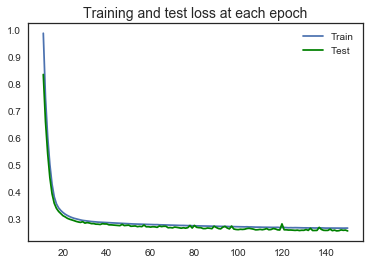

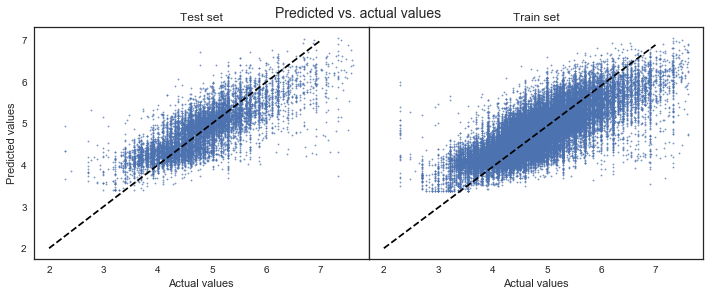

In [105]:
nn_model_evaluation(nn4, nn4_history, skip_epochs=10) # This model took several epochs before the loss was in a similar range to other models

The SGD optimizer performs slightly worse than the Adam optimizer. Also, y values less than 3 are still not being predicted.

### Model 5: neural network with dropout regularization at 50%

This model will be similar to Model 3, but will use dropout regularization instead. A dropout rate of 50% will be used. The number of epochs will be reduced to 50 as it does not seem to take as many as 150 epochs to reach optimum loss minimisation.dropout reg at 50%

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               7808      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               131584    
___________________________

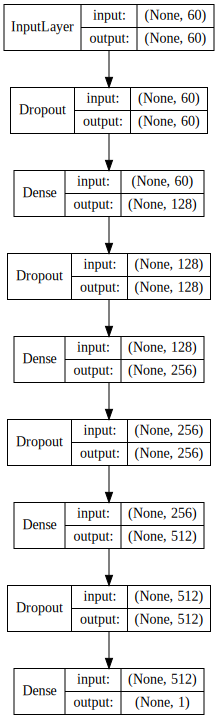

In [106]:
# Building the model
nn5 = models.Sequential()
nn5.add(layers.Dropout(0.5, input_shape=(X_train.shape[1],)))
nn5.add(layers.Dense(128, activation='relu'))
nn5.add(layers.Dropout(0.5))
nn5.add(layers.Dense(256, activation='relu'))
nn5.add(layers.Dropout(0.5))
nn5.add(layers.Dense(512, activation='relu'))
nn5.add(layers.Dropout(0.5))
nn5.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn5.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(nn5.summary())

# Visualising the neural network
SVG(model_to_dot(nn5, show_layer_names=False, show_shapes=True).create(prog='dot', format='svg'))

In [107]:
# Training the model
nn5_start = time.time()

nn5_history = nn5.fit(X_train,
                  y_train,
                  epochs=50,
                  batch_size=256,
                  validation_split = 0.1)

nn5_end = time.time()

print(f"Time taken to run: {round((nn5_end - nn5_start)/60,1)} minutes")

Train on 56693 samples, validate on 6300 samples
Epoch 1/50
56693/56693 [==============================] - 3s 49us/step - loss: 2.1425 - mean_squared_error: 2.1425 - val_loss: 6.8372 - val_mean_squared_error: 6.8372
Epoch 2/50
56693/56693 [==============================] - 3s 45us/step - loss: 0.9481 - mean_squared_error: 0.9481 - val_loss: 4.1379 - val_mean_squared_error: 4.1379
Epoch 3/50
56693/56693 [==============================] - 2s 44us/step - loss: 0.6822 - mean_squared_error: 0.6822 - val_loss: 1.3594 - val_mean_squared_error: 1.3594
Epoch 4/50
56693/56693 [==============================] - 3s 46us/step - loss: 0.5450 - mean_squared_error: 0.5450 - val_loss: 0.6701 - val_mean_squared_error: 0.6701
Epoch 5/50
56693/56693 [==============================] - 3s 50us/step - loss: 0.4970 - mean_squared_error: 0.4970 - val_loss: 0.5829 - val_mean_squared_error: 0.5829
Epoch 6/50
56693/56693 [==============================] - 3s 46us/step - loss: 0.4655 - mean_squared_error: 0.4655 -

56693/56693 [==============================] - 3s 50us/step - loss: 0.3339 - mean_squared_error: 0.3339 - val_loss: 0.2529 - val_mean_squared_error: 0.2529
Epoch 50/50
56693/56693 [==============================] - 2s 44us/step - loss: 0.3317 - mean_squared_error: 0.3317 - val_loss: 0.2702 - val_mean_squared_error: 0.2702
Time taken to run: 2.1 minutes


Training MSE: 0.2721
Validation MSE: 0.2805

Training r2: 0.4694
Validation r2: 0.4638


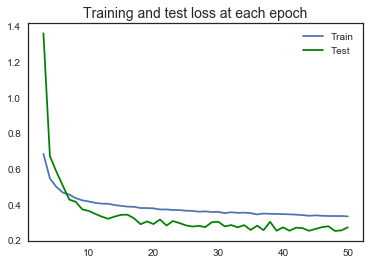

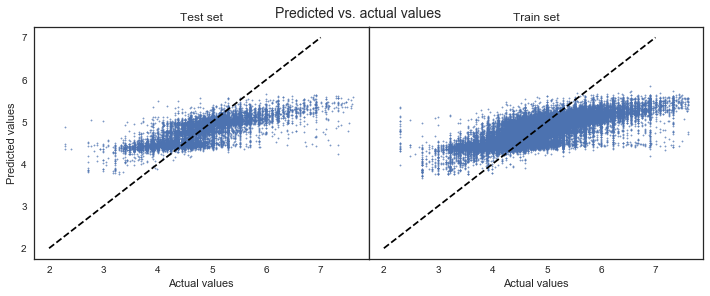

In [108]:
nn_model_evaluation(nn5, nn5_history, skip_epochs=2)

Using dropout validation has reduced the model performance substantially compared to L1 regularization.

### Model 6: Neural network with dropout regularization at 30% and a larger batch size

In order to confirm that dropout regularization is not the solution, it will be tried again using a lower dropout rate (30%), and the batch size will be increased.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_5 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               7808      
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
__________

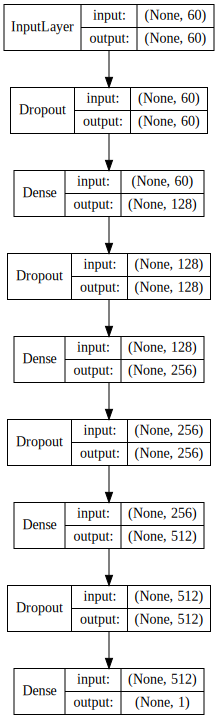

In [109]:
# Building the model
nn6 = models.Sequential()
nn6.add(layers.Dropout(0.2, input_shape=(X_train.shape[1],)))
nn6.add(layers.Dense(128, activation='relu'))
nn6.add(layers.Dropout(0.2))
nn6.add(layers.Dense(256, activation='relu'))
nn6.add(layers.Dropout(0.2))
nn6.add(layers.Dense(512, activation='relu'))
nn6.add(layers.Dropout(0.2))
nn6.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn6.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(nn6.summary())

# Visualising the neural network
SVG(model_to_dot(nn6, show_layer_names=False, show_shapes=True).create(prog='dot', format='svg'))

In [110]:
# Training the model
nn6_start = time.time()

nn6_history = nn6.fit(X_train,
                  y_train,
                  epochs=50,
                  batch_size=512,
                  validation_split = 0.1)

nn6_end = time.time()

print(f"Time taken to run: {round((nn6_end - nn6_start)/60,1)} minutes")

Train on 56693 samples, validate on 6300 samples
Epoch 1/50
56693/56693 [==============================] - 3s 55us/step - loss: 1.8005 - mean_squared_error: 1.8005 - val_loss: 1.0410 - val_mean_squared_error: 1.0410
Epoch 2/50
56693/56693 [==============================] - 3s 48us/step - loss: 0.5664 - mean_squared_error: 0.5664 - val_loss: 1.1979 - val_mean_squared_error: 1.1979
Epoch 3/50
56693/56693 [==============================] - 3s 48us/step - loss: 0.4762 - mean_squared_error: 0.4762 - val_loss: 1.1112 - val_mean_squared_error: 1.1112
Epoch 4/50
56693/56693 [==============================] - 3s 47us/step - loss: 0.4174 - mean_squared_error: 0.4174 - val_loss: 1.0853 - val_mean_squared_error: 1.0853
Epoch 5/50
56693/56693 [==============================] - 3s 46us/step - loss: 0.3888 - mean_squared_error: 0.3888 - val_loss: 0.8433 - val_mean_squared_error: 0.8433
Epoch 6/50
56693/56693 [==============================] - 3s 46us/step - loss: 0.3610 - mean_squared_error: 0.3610 -

56693/56693 [==============================] - 3s 47us/step - loss: 0.2438 - mean_squared_error: 0.2438 - val_loss: 0.2123 - val_mean_squared_error: 0.2123
Epoch 50/50
56693/56693 [==============================] - 3s 49us/step - loss: 0.2434 - mean_squared_error: 0.2434 - val_loss: 0.2131 - val_mean_squared_error: 0.2131
Time taken to run: 2.1 minutes


Training MSE: 0.2088
Validation MSE: 0.2251

Training r2: 0.5927
Validation r2: 0.5697


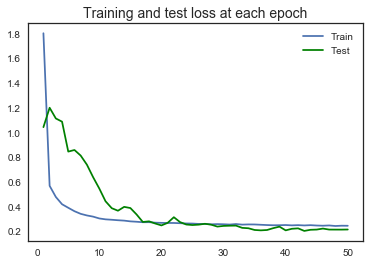

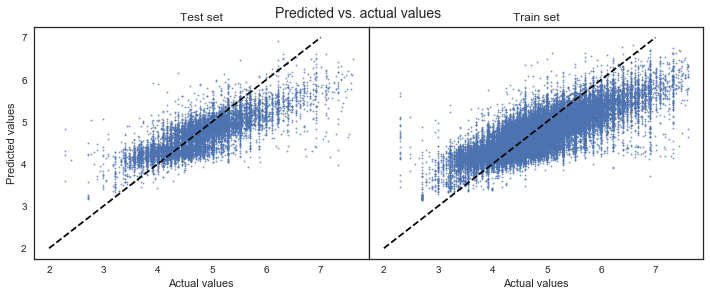

In [111]:
nn_model_evaluation(nn6, nn6_history)

In order to confirm that dropout regularization is not the solution, it will be tried again using a lower dropout rate (30%), and the batch size will be increased.

### Model 7: removing excess review rating features

So far, a number of hyperparameters have been tuned in order to increase the performance of the NN. Adding extra layers can often increase the performance of a NN, at the cost of increasing computational requirements. Before experimenting further with additional layers, it is worth going back to consider whether the best possible features are being included.

In the 'Preparing the data for modeling' section above, it was noted that a lot of the review columns are reasonably highly correlated with each other. They were left in to see whether they would be useful after all. However, the feature importances graph produced by the XGBoost model suggest that they were of relatively low importance.

This model will drop review columns other than the overall review rating, and use the same NN structure as Model 3, in order to see whether this produces a better model.

Columns will be dropped from the existing X_train and X_test split, for consistency.

In [112]:
all_review = list(X_train.columns[X_train.columns.str.startswith("review_scores")])
review_to_keep = list(X_train.columns[X_train.columns.str.startswith("review_scores_rating")])
review_to_drop = [x for x in all_review if x not in review_to_keep]

X_train_short = X_train.drop(review_to_drop, axis=1)
X_test_short = X_test.drop(review_to_drop, axis=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 128)               7808      
_________________________________________________________________
dense_24 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_25 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_26 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 513       
Total params: 238,721
Trainable params: 238,721
Non-trainable params: 0
_________________________________________________________________
None


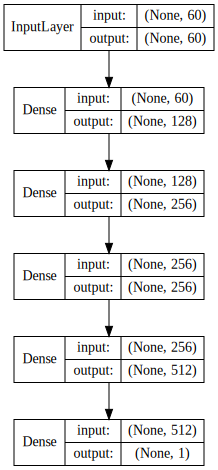

In [113]:
# Building the model
nn7 = models.Sequential()
nn7.add(layers.Dense(128, input_shape=(X_train_short.shape[1],), kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn7.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn7.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn7.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn7.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn7.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(nn7.summary())

# Visualising the neural network
SVG(model_to_dot(nn7, show_layer_names=False, show_shapes=True).create(prog='dot', format='svg'))

In [114]:
# Training the model
nn7_start = time.time()

nn7_history = nn7.fit(X_train_short,
                  y_train,
                  epochs=50,
                  batch_size=256,
                  validation_split=0.1)

nn7_end = time.time()

print(f"Time taken to run: {round((nn7_end - nn7_start)/60,1)} minutes")

Train on 56693 samples, validate on 6300 samples
Epoch 1/50
56693/56693 [==============================] - 3s 48us/step - loss: 24.6781 - mean_squared_error: 0.7593 - val_loss: 7.2005 - val_mean_squared_error: 0.2407
Epoch 2/50
56693/56693 [==============================] - 2s 41us/step - loss: 3.6633 - mean_squared_error: 0.2161 - val_loss: 1.6727 - val_mean_squared_error: 0.2163
Epoch 3/50
56693/56693 [==============================] - 3s 45us/step - loss: 1.0559 - mean_squared_error: 0.2223 - val_loss: 0.6743 - val_mean_squared_error: 0.2148
Epoch 4/50
56693/56693 [==============================] - 3s 45us/step - loss: 0.5506 - mean_squared_error: 0.2191 - val_loss: 0.4611 - val_mean_squared_error: 0.2081
Epoch 5/50
56693/56693 [==============================] - 2s 42us/step - loss: 0.4387 - mean_squared_error: 0.2146 - val_loss: 0.4101 - val_mean_squared_error: 0.2046
Epoch 6/50
56693/56693 [==============================] - 3s 45us/step - loss: 0.4092 - mean_squared_error: 0.2123 

56693/56693 [==============================] - 2s 41us/step - loss: 0.3777 - mean_squared_error: 0.2069 - val_loss: 0.3679 - val_mean_squared_error: 0.1979
Epoch 50/50
56693/56693 [==============================] - 3s 45us/step - loss: 0.3776 - mean_squared_error: 0.2072 - val_loss: 0.3690 - val_mean_squared_error: 0.1986
Time taken to run: 2.1 minutes


Training MSE: 0.2053
Validation MSE: 0.2101

Training r2: 0.5995
Validation r2: 0.5984


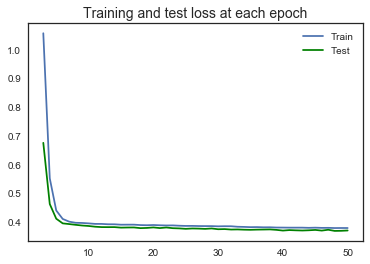

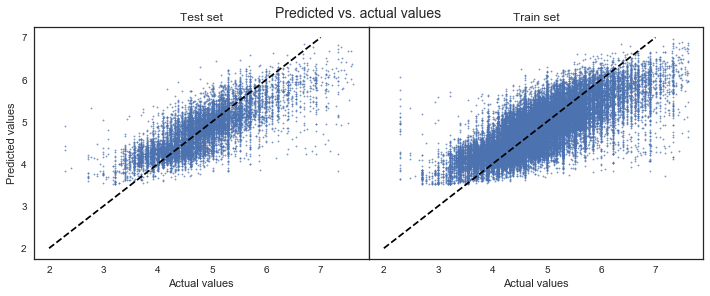

In [115]:
nn_model_evaluation(nn7, nn7_history, skip_epochs=2, X_train=X_train_short, X_test=X_test_short)

The model with the additional review columns removed performs almost exactly the same as the best previous NN (Model 3). Therefore, because it is able to achieve the same performance with 18 fewer columns, it is the preferred model when choosing which model to put into production as it would require less data and be less computationally expensive.

### Model 8: five-layer neural network with a min-max scaler

Model 3 is still the best model. As a final attempt to improve its performance, an alternative scaling method will be used (min-max scaling to a range of 0-1) and an additional layer will be added.

In [116]:
# Dropping review columns from the original dataframe (after log transformation)
df_minmax = transformed_df.drop(review_to_drop, axis=1)

# Separating X and y
X_minmax = df_minmax.drop('log_price', axis=1)
y_minmax = df_minmax.log_price

# Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
X_minmax = pd.DataFrame(scaler.fit_transform(X_minmax), columns=list(X_minmax.columns))

# Splitting into train and test sets
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(X_minmax, y_minmax, test_size=0.2, random_state=123)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 128)               7808      
_________________________________________________________________
dense_29 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_30 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_31 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_32 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 1025      
Total params: 764,545
Trainable params: 764,545
Non-trainable params: 0
_________________________________________________________________
None

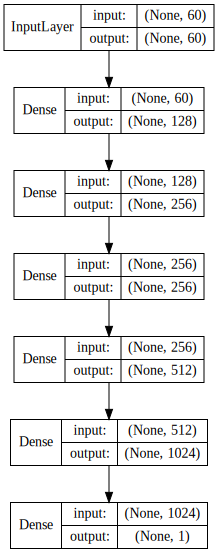

In [117]:
# Building the model
nn9 = models.Sequential()
nn9.add(layers.Dense(128, input_shape=(X_train_minmax.shape[1],), kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn9.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn9.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn9.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn9.add(layers.Dense(1024, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn9.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn9.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(nn9.summary())

# Visualising the neural network
SVG(model_to_dot(nn9, show_layer_names=False, show_shapes=True).create(prog='dot', format='svg'))

In [118]:
# Training the model
nn9_start = time.time()

nn9_history = nn9.fit(X_train_minmax,
                  y_train_minmax,
                  epochs=80,
                  batch_size=256,
                  validation_split = 0.1)

nn9_end = time.time()

print(f"Time taken to run: {round((nn9_end - nn9_start)/60,1)} minutes")

Train on 53359 samples, validate on 5929 samples
Epoch 1/80
53359/53359 [==============================] - 8s 150us/step - loss: 34.3220 - mean_squared_error: 0.8400 - val_loss: 7.0799 - val_mean_squared_error: 0.2606
Epoch 2/80
53359/53359 [==============================] - 8s 147us/step - loss: 4.3979 - mean_squared_error: 0.2755 - val_loss: 2.7498 - val_mean_squared_error: 0.2721
Epoch 3/80
53359/53359 [==============================] - 8s 141us/step - loss: 2.0646 - mean_squared_error: 0.2603 - val_loss: 1.5704 - val_mean_squared_error: 0.2432
Epoch 4/80
53359/53359 [==============================] - 7s 138us/step - loss: 1.3391 - mean_squared_error: 0.2489 - val_loss: 1.1411 - val_mean_squared_error: 0.2339
Epoch 5/80
53359/53359 [==============================] - 8s 142us/step - loss: 1.0463 - mean_squared_error: 0.2406 - val_loss: 0.9531 - val_mean_squared_error: 0.2278
Epoch 6/80
53359/53359 [==============================] - 7s 138us/step - loss: 0.9124 - mean_squared_error: 0

53359/53359 [==============================] - 7s 138us/step - loss: 0.7228 - mean_squared_error: 0.2250 - val_loss: 0.7156 - val_mean_squared_error: 0.2178
Epoch 50/80
53359/53359 [==============================] - 8s 145us/step - loss: 0.7224 - mean_squared_error: 0.2249 - val_loss: 0.7097 - val_mean_squared_error: 0.2143
Epoch 51/80
53359/53359 [==============================] - 8s 155us/step - loss: 0.7227 - mean_squared_error: 0.2250 - val_loss: 0.7126 - val_mean_squared_error: 0.2141
Epoch 52/80
53359/53359 [==============================] - 8s 145us/step - loss: 0.7225 - mean_squared_error: 0.2254 - val_loss: 0.7142 - val_mean_squared_error: 0.2159
Epoch 53/80
53359/53359 [==============================] - 8s 155us/step - loss: 0.7214 - mean_squared_error: 0.2247 - val_loss: 0.7121 - val_mean_squared_error: 0.2139
Epoch 54/80
53359/53359 [==============================] - 8s 149us/step - loss: 0.7207 - mean_squared_error: 0.2243 - val_loss: 0.7115 - val_mean_squared_error: 0.214

Training MSE: 0.2208
Validation MSE: 0.2232

Training r2: 0.5696
Validation r2: 0.5699


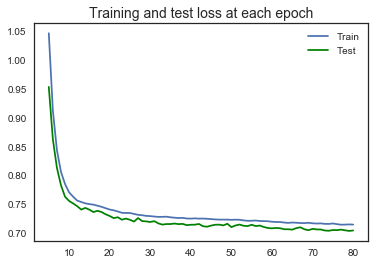

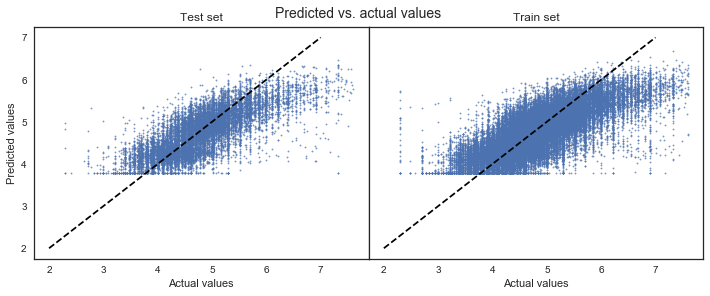

In [119]:
nn_model_evaluation(nn9, nn9_history, skip_epochs=4, X_train=X_train_minmax, X_test=X_test_minmax, y_train=y_train_minmax, y_test=y_test_minmax)

The five-layer NN performs worse than the previous best-scoring NN (Model 7).

## Generating Predictions

Change the parameters based on the model you want the predicitons from

In [120]:
test_df = pd.read_csv('2.csv')
test_df.set_index('id', inplace=True)
X2 = test_df
X2 = pd.DataFrame(scaler.fit_transform(X2), columns=list(X2.columns))

In [121]:
y2 = nn4.predict(X2)
for i in range(len(X2)):
    print(y2[i])

[4.668631]
[5.3735847]
[4.682822]
[5.1208305]
[5.334999]
[4.759139]
[5.335784]
[5.3460655]
[5.373657]
[4.785137]
[4.807826]
[5.1834097]
[5.320369]
[4.490259]
[5.153389]
[5.362178]
[5.389144]
[4.891968]
[5.3831987]
[5.4668055]
[5.3424416]
[5.380828]
[4.939089]
[5.285762]
[5.114336]
[5.32452]
[4.7214518]
[5.3462296]
[5.3713646]
[4.8187103]
[5.289321]
[4.720602]
[4.7729187]
[5.3442497]
[5.341013]
[5.3318663]
[5.3223124]
[5.145959]
[5.4445734]
[4.866247]
[5.428998]
[5.2547073]
[5.3216677]
[4.929722]
[5.4714556]
[4.76233]
[5.2297344]
[5.3024797]
[4.702035]
[4.8160677]
[4.844035]
[4.8699055]
[5.2115]
[4.75893]
[5.2451906]
[5.3035946]
[5.3442755]
[5.4022627]
[5.3481054]
[5.374922]
[4.538327]
[4.687798]
[5.350853]
[5.4318867]
[4.6544533]
[5.4363003]
[5.433649]
[5.294711]
[5.1872196]
[5.312784]
[5.325783]
[5.3218384]
[4.7121096]
[4.637294]
[4.7247095]
[5.304101]
[4.7912436]
[4.8546743]
[5.28335]
[4.580964]
[5.3323984]
[4.675484]
[5.3376064]
[5.528757]
[4.763036]
[5.4036713]
[4.743881]
[4.859832

[5.2213783]
[4.7521744]
[5.2856693]
[5.4045143]
[5.228507]
[5.393837]
[5.3005905]
[5.2793064]
[5.2953663]
[4.5944877]
[5.368863]
[5.2790337]
[4.7478304]
[5.304942]
[5.3897038]
[4.7727175]
[4.7643347]
[5.1851645]
[5.3635845]
[4.773508]
[4.7238455]
[4.781769]
[4.713331]
[4.6186433]
[4.765686]
[4.5775294]
[5.1736927]
[5.338642]
[5.1913395]
[5.413577]
[5.1264515]
[4.670343]
[5.3109636]
[5.149804]
[5.2823954]
[5.4016657]
[5.311288]
[5.3440113]
[4.793172]
[4.73442]
[4.504433]
[4.730131]
[5.3301554]
[5.287466]
[5.309717]
[5.3250303]
[5.193678]
[5.3337507]
[4.7239246]
[5.230032]
[4.589778]
[4.492277]
[4.66331]
[4.6801777]
[4.652788]
[5.3913803]
[5.286895]
[5.3015757]
[4.790715]
[5.286296]
[5.2256308]
[5.3777094]
[4.749588]
[4.8590803]
[5.346779]
[4.7040386]
[5.3458853]
[4.7512455]
[5.4561834]
[4.5100985]
[5.3798113]
[4.784692]
[4.7793303]
[5.2132807]
[4.7659197]
[4.749443]
[4.7403803]
[5.23909]
[5.202648]
[4.6223655]
[4.670001]
[4.6521463]
[5.25721]
[5.3824797]
[4.6775427]
[4.7194967]
[4.73183

[4.876096]
[4.824708]
[5.1611204]
[5.4147043]
[5.223937]
[5.496213]
[4.678151]
[5.3319473]
[5.3489447]
[5.3628597]
[4.7700014]
[4.601523]
[5.359172]
[4.6744757]
[4.680461]
[5.2564926]
[4.744007]
[5.224558]
[5.258919]
[5.318204]
[5.3229523]
[5.246505]
[5.272975]
[5.3742237]
[5.199069]
[5.2924767]
[4.7827854]
[4.8465233]
[5.2773066]
[5.421855]
[4.757921]
[4.673451]
[4.870183]
[5.412118]
[4.7093353]
[5.2785206]
[4.8669252]
[5.336013]
[5.181984]
[5.224057]
[4.6025786]
[5.3189545]
[4.849183]
[5.327688]
[5.1750326]
[4.8835554]
[4.7889633]
[5.2478685]
[4.805237]
[4.543556]
[4.8472834]
[4.6124616]
[5.4191055]
[5.2216015]
[4.8165426]
[5.3091984]
[5.321335]
[5.2677717]
[5.4102077]
[5.3978767]
[4.6447678]
[5.340575]
[5.316105]
[4.841037]
[5.2962265]
[4.773718]
[4.6038074]
[5.267804]
[4.58729]
[5.3826685]
[5.464408]
[4.785591]
[5.385375]
[5.209487]
[4.576592]
[4.5513735]
[5.295516]
[5.373536]
[4.7011213]
[5.4227247]
[5.4014893]
[4.799547]
[5.378969]
[5.2654457]
[4.757058]
[5.256446]
[5.377084]
[4.

[5.2372875]
[4.6667614]
[5.20004]
[4.763136]
[4.7960663]
[4.549136]
[5.293153]
[4.767108]
[4.7148542]
[5.2852964]
[4.6961217]
[5.1998034]
[5.269305]
[5.271557]
[5.2331047]
[4.769534]
[4.6369877]
[5.411111]
[5.2579336]
[5.3614845]
[4.7857]
[4.6286106]
[4.8138056]
[5.2047777]
[4.6689796]
[5.368184]
[5.2633543]
[4.7404575]
[4.7984533]
[5.435485]
[4.8021336]
[4.7728825]
[5.23098]
[4.746455]
[4.5629234]
[5.253893]
[4.721019]
[5.335492]
[5.2247066]
[5.2549086]
[5.3394804]
[5.38645]
[5.4084177]
[4.7239094]
[5.3267374]
[5.25539]
[4.7033567]
[5.338936]
[5.2867956]
[4.574296]
[5.378601]
[4.8527975]
[4.5970597]
[4.843833]
[4.826048]
[5.3362036]
[4.729128]
[5.1464167]
[4.704479]
[5.2026567]
[5.451235]
[4.6458855]
[5.2268724]
[5.1503153]
[4.81981]
[4.7879896]
[5.3486147]
[5.2936926]
[4.7181864]
[5.203313]
[4.6200027]
[5.3659286]
[5.409398]
[5.3502398]
[4.724882]
[5.316965]
[4.7997828]
[5.2336025]
[5.325077]
[5.300912]
[5.3209486]
[5.462702]
[4.7888374]
[4.6373415]
[5.3516397]
[4.6823826]
[5.334985]

[4.727256]
[5.2866135]
[4.566081]
[5.278981]
[4.7218733]
[4.796072]
[4.7558355]
[4.7525826]
[5.2011166]
[5.3307314]
[5.3115444]
[5.271694]
[5.267538]
[5.2436543]
[4.765417]
[4.803959]
[5.1732273]
[4.8021936]
[4.7079954]
[5.3426723]
[5.4696865]
[4.771143]
[5.3281136]
[4.6416197]
[5.2880907]
[5.3049116]
[5.166607]
[5.356]
[4.6029816]
[5.4112234]
[4.620202]
[4.6913643]
[5.4333878]
[5.357937]
[5.1612883]
[5.252453]
[4.5145597]
[4.790078]
[4.6643343]
[5.3949356]
[5.394518]
[5.214444]
[5.2077465]
[4.775177]
[4.8464746]
[5.3170137]
[5.2117844]
[4.828742]
[5.2996674]
[5.2634296]
[5.300667]
[5.401498]
[5.4069767]
[4.69228]
[4.7949514]
[5.2676334]
[5.432122]
[5.24131]
[5.2433596]
[4.6573334]
[4.626879]
[4.83022]
[4.720169]
[5.35983]
[4.649087]
[5.351796]
[4.6657743]
[5.2132864]
[5.2934446]
[5.3870955]
[5.276497]
[5.429759]
[5.4397993]
[5.435691]
[5.186961]
[5.3860598]
[4.808958]
[4.684472]
[5.48217]
[5.3579683]
[4.7326775]
[5.179736]
[5.3639793]
[4.70453]
[5.436983]
[5.305094]
[5.196411]
[5.2685

[5.3363457]
[5.2995443]
[5.3076916]
[5.2162333]
[4.7763004]
[4.7648783]
[5.210497]
[4.762844]
[5.4324617]
[5.2821627]
[4.864723]
[4.7777777]
[5.3416557]
[4.602716]
[4.6088696]
[4.699607]
[4.8196125]
[4.7632856]
[5.270505]
[4.7201996]
[5.2576313]
[4.690898]
[5.4639053]
[4.787223]
[4.615034]
[4.7018423]
[5.317113]
[4.701293]
[5.265856]
[4.8363075]
[4.6899047]
[5.26954]
[4.7625933]
[5.2969685]
[4.7495327]
[4.726345]
[5.1219454]
[4.5706053]
[5.4123]
[5.2016754]
[5.4639444]
[4.729991]
[4.737446]
[5.2000027]
[4.599182]
[4.7678986]
[5.352025]
[4.591518]
[4.6213264]
[5.344082]
[5.2505198]
[4.7688313]
[5.3687725]
[5.5742702]
[5.284092]
[5.325222]
[5.324938]
[4.7771072]
[4.62463]
[5.482847]
[5.3714724]
[4.726493]
[4.6821933]
[4.7474127]
[5.3852158]
[5.1306753]
[5.330987]
[4.627125]
[4.8894396]
[5.451812]
[4.772233]
[4.3697634]
[5.155902]
[5.2192307]
[5.4780874]
[4.7859745]
[5.4595957]
[5.4681387]
[4.8425207]
[5.3632545]
[5.2792835]
[4.6283307]
[4.749755]
[5.30064]
[4.647003]
[4.7970715]
[4.81557

[4.714962]
[5.276824]
[4.761613]
[5.3877153]
[4.55245]
[4.6008224]
[5.2869816]
[5.5084715]
[4.6420603]
[5.331686]
[5.264097]
[5.155941]
[5.334157]
[5.46107]
[5.235567]
[4.6814203]
[5.411456]
[5.2948427]
[5.3711157]
[4.75023]
[5.3352575]
[4.657091]
[5.2430363]
[5.3652]
[5.301524]
[4.772545]
[5.3974686]
[4.7500362]
[5.262971]
[5.313307]
[5.304348]
[5.395877]
[5.350606]
[5.344309]
[5.2265654]
[5.282981]
[5.4519377]
[4.8006153]
[5.300192]
[4.776016]
[4.8286657]
[4.8771677]
[5.1105814]
[5.383375]
[4.695284]
[4.67461]
[5.292351]
[4.657337]
[5.4458065]
[5.2917166]
[5.141347]
[5.3692875]
[4.631259]
[4.8161488]
[5.339383]
[4.7024]
[5.417824]
[5.3903484]
[5.2755756]
[4.82771]
[4.7264795]
[4.761918]
[4.828808]
[4.930791]
[5.377389]
[4.7011147]
[5.3538494]
[5.305668]
[5.345954]
[4.726695]
[4.626775]
[5.4633503]
[5.2107534]
[4.750164]
[5.363757]
[5.272398]
[5.325449]
[5.286148]
[4.643775]
[5.3088865]
[4.667174]
[5.2305174]
[5.26735]
[4.528015]
[5.226838]
[5.2850895]
[5.4218264]
[5.2116776]
[4.66226

[5.3473463]
[5.400489]
[4.662341]
[4.690381]
[5.552085]
[4.724225]
[5.3373575]
[5.252227]
[5.3960276]
[5.3478384]
[5.237236]
[4.663224]
[4.762987]
[5.202855]
[4.8313246]
[5.28701]
[4.6723323]
[5.3318596]
[4.6470613]
[5.1100683]
[4.827257]
[5.352518]
[4.8598623]
[5.268403]
[5.160431]
[4.691293]
[5.4025927]
[5.312771]
[5.1399994]
[5.3363056]
[5.3046513]
[5.4811497]
[5.2133846]
[4.6069727]
[4.6725845]
[5.3056784]
[4.648218]
[5.2636786]
[5.272127]
[5.3136396]
[4.7801914]
[5.3803797]
[5.5192957]
[4.60764]
[4.7133827]
[4.8402567]
[5.3323803]
[5.229394]
[4.720994]
[4.8188753]
[4.6740637]
[4.7450857]
[5.3041306]
[5.3659506]
[5.3389797]
[5.304755]
[5.282902]
[5.372299]
[5.2235947]
[5.2158556]
[5.2797394]
[5.390996]
[4.6922655]
[4.754689]
[4.74249]
[5.322921]
[5.2149343]
[5.262294]
[4.683302]
[4.696069]
[4.777807]
[5.3654823]
[4.5994377]
[5.2054195]
[5.323471]
[5.371193]
[5.3238535]
[4.843027]
[5.165576]
[5.345812]
[4.892253]
[5.421625]
[4.7199163]
[4.6874514]
[5.135932]
[4.572674]
[4.68059]
[5.

[5.3677235]
[4.8439837]
[4.6932263]
[4.553877]
[5.1793594]
[4.7866116]
[5.4853497]
[4.599062]
[5.2634706]
[5.428173]
[4.743724]
[4.611244]
[5.309968]
[5.3762064]
[4.830469]
[5.2499533]
[4.789507]
[5.1717386]
[4.5544796]
[4.485778]
[4.5086]
[5.2564926]
[5.4344816]
[4.8187695]
[5.312006]
[5.287013]
[4.8711004]
[4.73927]
[4.63787]
[4.707881]
[5.2071104]
[5.424143]
[4.7274504]
[5.370036]
[4.742379]
[4.751646]
[5.340825]
[5.365427]
[5.553362]
[4.7939014]
[5.303089]
[4.7700615]
[5.212323]
[5.379285]
[4.761402]
[5.2986984]
[4.839118]
[4.664289]
[5.218112]
[4.724472]
[4.672452]
[4.869275]
[4.848295]
[4.7053347]
[5.238323]
[4.668586]
[5.307003]
[5.331415]
[5.392124]
[5.1869907]
[5.2420893]
[5.249655]
[5.3534193]
[5.174531]
[5.222728]
[5.4558344]
[4.705783]
[5.4306107]
[5.4790487]
[5.2590847]
[4.9143353]
[5.3442297]
[5.2853613]
[5.218869]
[5.2420187]
[5.2090607]
[4.6869135]
[5.4037447]
[5.4615955]
[5.303812]
[4.6418896]
[4.817518]
[5.410227]
[4.643718]
[5.364888]
[5.405962]
[5.32934]
[5.3046074]

[5.2551937]
[4.7821493]
[4.7549915]
[5.3256416]
[5.430291]
[5.275279]
[5.306793]
[4.6898127]
[5.2029943]
[4.722786]
[5.3859825]
[5.3281946]
[4.6371355]
[4.7101793]
[5.3158903]
[4.6119614]
[4.8486805]
[4.6615725]
[5.4298134]
[5.1264153]
[4.7351465]
[5.3423595]
[4.830303]
[5.496109]
[5.1584396]
[5.3411036]
[4.8039703]
[4.7428865]
[4.769532]
[4.7564907]
[4.755747]
[5.387639]
[5.2425985]
[5.245454]
[5.4526634]
[5.1594667]
[5.3678045]
[4.705907]
[4.739064]
[4.739398]
[5.245081]
[5.24611]
[5.2867804]
[4.6993637]
[4.786624]
[5.39861]
[4.727475]
[4.640771]
[4.796136]
[5.2927303]
[4.6534324]
[4.603195]
[5.31244]
[5.354624]
[4.7660036]
[5.375931]
[5.4788923]
[5.3878117]
[4.835618]
[5.3722935]
[4.6526423]
[4.6494074]
[4.73059]
[5.4398527]
[5.140195]
[5.426054]
[4.535489]
[4.667424]
[4.6420445]
[5.541008]
[5.241802]
[5.271702]
[5.368067]
[5.384838]
[4.667309]
[5.2468405]
[5.21212]
[4.831235]
[4.6478376]
[5.3147182]
[4.590884]
[5.263172]
[5.3128824]
[5.3019953]
[4.7855396]
[4.7102575]
[4.635363]
[4

[5.376169]
[5.345107]
[4.7000113]
[5.2176857]
[5.2499933]
[5.354615]
[5.4212685]
[5.2214937]
[4.848027]
[5.454067]
[5.3973684]
[5.2351427]
[4.667161]
[5.3782854]
[4.757023]
[5.316642]
[5.2760725]
[5.2134466]
[4.6655626]
[5.312191]
[4.6875467]
[5.3009624]
[4.800482]
[5.3189754]
[4.711622]
[5.2665615]
[5.170658]
[5.3286304]
[5.29967]
[4.788188]
[5.362335]
[4.655031]
[5.268298]
[5.3514786]
[5.2894135]
[4.740286]
[4.7996893]
[5.3496494]
[5.362957]
[4.838539]
[4.713936]
[4.618907]
[4.5007353]
[4.8106995]
[5.3707724]
[5.5132427]
[5.1866198]
[5.2994976]
[5.31106]
[4.834841]
[5.3973503]
[5.2840004]
[4.760578]
[4.651989]
[5.3869476]
[5.471587]
[4.604711]
[4.8478775]
[5.172271]
[5.245775]
[5.1112614]
[4.8114214]
[5.1949663]
[4.795909]
[5.3205957]
[4.81756]
[4.622451]
[4.747143]
[5.4260397]
[5.2067137]
[5.394449]
[4.8299246]
[4.6995792]
[5.2906237]
[5.336376]
[5.370244]
[5.299855]
[5.384922]
[5.15306]
[4.6337624]
[5.2549963]
[4.6849213]
[5.2296276]
[5.225168]
[4.870652]
[5.382681]
[4.573251]
[4.6

[4.7136173]
[5.4667788]
[4.9004917]
[5.2783318]
[4.6632004]
[4.8327103]
[5.4258385]
[5.3572874]
[5.3133326]
[4.7451925]
[4.7787647]
[4.782942]
[5.2762117]
[4.6862297]
[4.6151886]
[5.3600197]
[4.649146]
[5.368087]
[4.6227264]
[5.3121243]
[4.7333546]
[5.227401]
[5.215542]
[5.350424]
[5.3698473]
[5.190528]
[4.7961636]
[5.2409086]
[4.705205]
[4.851102]
[4.778783]
[4.795185]
[4.5989704]
[4.628531]
[4.662675]
[5.317748]
[4.8172646]
[5.182617]
[4.7070904]
[4.756607]
[4.7542458]
[5.253952]
[5.320133]
[4.6262302]
[4.680976]
[4.6854095]
[4.713745]
[4.677502]
[4.7243013]
[5.4513245]
[5.420326]
[4.801978]
[4.8544025]
[5.3506145]
[4.6604986]
[4.9132853]
[4.757265]
[4.8082447]
[4.71943]
[5.3091116]
[4.799531]
[4.8564167]
[5.317631]
[5.3686724]
[4.7385244]
[5.2356157]
[5.2859774]
[4.76027]
[4.564449]
[4.836627]
[4.74253]
[4.6296587]
[5.2578936]
[4.734129]
[4.6895475]
[4.7265186]
[4.8097353]
[4.8146095]
[5.244461]
[5.290612]
[5.4029083]
[5.3720303]
[5.271861]
[5.2223616]
[5.295989]
[4.6344376]
[5.2844

[5.3927937]
[5.4084663]
[4.806096]
[4.5062265]
[5.322711]
[4.86329]
[4.7041016]
[5.2439947]
[4.6017447]
[4.598789]
[4.70792]
[5.3827715]
[4.7468214]
[5.279647]
[4.642074]
[4.7077427]
[5.404641]
[5.394246]
[4.8811016]
[5.514533]
[4.8208313]
[5.151829]
[4.784773]
[5.352453]
[4.704337]
[5.1899223]
[4.7334127]
[4.7175407]
[4.8106585]
[4.7086]
[5.384062]
[5.1589336]
[5.4072914]
[4.847802]
[4.756982]
[4.735264]
[4.7220955]
[5.354171]
[5.5057087]
[4.861017]
[5.2966843]
[5.3156767]
[4.807808]
[5.484125]
[5.3416862]
[4.72713]
[5.2418413]
[5.268632]
[5.165064]
[5.28848]
[4.7401075]
[5.343341]
[5.348241]
[4.754163]
[5.3148994]
[5.3323946]
[5.3147793]
[5.477806]
[4.854822]
[4.8581123]
[4.776314]
[5.3042154]
[5.403594]
[4.6386013]
[5.3525314]
[5.502721]
[5.2595863]
[5.173605]
[5.2011633]
[5.4467983]
[5.229945]
[4.7633295]
[4.7716694]
[4.7084074]
[5.308421]
[5.3722515]
[4.7892485]
[4.676737]
[5.342203]
[4.8283567]
[4.70193]
[4.8322544]
[4.630862]
[5.4042816]
[4.7617464]
[5.3058825]
[5.288932]
[4.795

[5.387953]
[4.860841]
[4.785678]
[4.8530884]
[5.2471294]
[4.666321]
[4.572528]
[4.586941]
[4.742174]
[5.240081]
[5.3917646]
[4.693371]
[5.315943]
[5.2108]
[5.305908]
[4.7718735]
[5.26731]
[4.6297092]
[5.2409267]
[4.785486]
[5.4745893]
[4.7216682]
[4.865283]
[5.226719]
[5.2416744]
[5.331049]
[4.595038]
[4.746291]
[4.7142334]
[5.3198957]
[4.84575]
[5.243985]
[4.702733]
[5.2382774]
[5.347927]
[4.7353477]
[4.591055]
[5.5473757]
[5.4580956]
[5.425618]
[5.320863]
[5.177046]
[4.644129]
[5.2302303]
[5.3645725]
[4.8619356]
[5.328412]
[5.267337]
[5.2612524]
[4.6853533]
[5.341984]
[4.7978334]
[5.2968082]
[4.7631645]
[5.227599]
[5.3489876]
[5.442275]
[5.381771]
[5.37455]
[4.7018156]
[5.317915]
[5.4019356]
[5.288061]
[4.7207584]
[4.7558746]
[4.821251]
[4.795822]
[5.1669817]
[5.3716326]
[5.5265045]
[4.7810154]
[4.7333336]
[5.365302]
[4.7416945]
[4.7466736]
[4.748398]
[5.31744]
[5.1765213]
[4.729808]
[4.744378]
[5.4382935]
[5.3675947]
[5.3099775]
[5.2673254]
[5.276513]
[5.214361]
[4.8148737]
[4.76952

[4.7753687]
[5.3106537]
[5.4707985]
[5.2226505]
[5.293624]
[4.794319]
[4.568979]
[4.7949753]
[5.5223713]
[4.7307587]
[4.90621]
[5.27059]
[5.21647]
[5.2180443]
[4.7210455]
[5.2960396]
[5.2963076]
[5.3848667]
[4.764797]
[5.3879404]
[5.329485]
[4.8172827]
[5.408801]
[4.671955]
[5.3180876]
[5.3646145]
[4.7203636]
[5.2890463]
[5.404811]
[5.326936]
[4.851239]
[4.7898874]
[4.802658]
[5.288622]
[4.880582]
[5.241659]
[5.299221]
[4.8483753]
[5.3034945]
[4.78419]
[4.8834715]
[4.560611]
[5.290739]
[4.7628613]
[5.3691807]
[5.3873787]
[4.72322]
[5.409337]
[4.717293]
[5.4170732]
[5.3623734]
[4.8370695]
[5.319728]
[4.812089]
[5.3323603]
[5.469389]
[4.7524548]
[4.7157784]
[4.847583]
[5.4364395]
[4.6895347]
[4.8215103]
[5.3086395]
[4.590602]
[4.7269125]
[4.735488]
[4.749193]
[5.3002644]
[4.7837286]
[4.666029]
[5.3211784]
[4.7059736]
[5.189433]
[5.381132]
[4.8756475]
[4.836158]
[5.4467983]
[5.2053795]
[4.5458255]
[5.2250385]
[5.301897]
[5.4330072]
[4.6980515]
[5.1719427]
[4.874667]
[5.384053]
[5.2883873]

[4.791334]
[4.708766]
[5.511175]
[5.252432]
[5.374633]
[4.719795]
[4.7032166]
[4.7635393]
[4.7076073]
[5.1783066]
[5.4243526]
[5.253421]
[5.299032]
[5.40469]
[5.3802404]
[5.2731495]
[5.152481]
[5.4330835]
[5.4146786]
[4.6154747]
[4.729828]
[4.7797356]
[4.725238]
[4.7817745]
[4.7889366]
[5.4690228]
[5.447016]
[5.2472763]
[4.655924]
[4.765156]
[4.802943]
[5.210641]
[4.665097]
[4.7612085]
[4.653104]
[5.428694]
[5.1322794]
[5.373807]
[5.3322487]
[4.6991568]
[4.737837]
[4.7439117]
[5.3367367]
[5.264723]
[4.824444]
[5.1905174]
[4.645113]
[5.3202724]
[4.766142]
[4.7098713]
[4.6282997]
[5.3595333]
[4.732296]
[5.2066774]
[5.254426]
[5.4222307]
[4.850543]
[5.438491]
[4.581954]
[5.269224]
[5.15067]
[5.245842]
[4.7358932]
[4.7687654]
[4.63237]
[4.735111]
[5.27816]
[4.6458364]
[4.7436037]
[5.428896]
[4.699645]
[4.768427]
[5.4631233]
[4.758937]
[5.182046]
[4.8468924]
[5.3939047]
[5.5183315]
[5.2738123]
[5.321786]
[4.598007]
[5.2898445]
[4.771802]
[4.7765207]
[4.8111143]
[5.3449135]
[4.7265806]
[5.16

[5.467085]
[5.3903313]
[4.66335]
[4.8233805]
[5.1883907]
[4.7225475]
[5.424535]
[4.834671]
[4.621998]
[4.758856]
[5.326727]
[4.6530805]
[4.714137]
[4.7888203]
[5.3973246]
[5.2897873]
[5.276335]
[5.4253845]
[5.2789555]
[4.640334]
[5.145977]
[5.230562]
[4.7002726]
[5.3446693]
[5.352216]
[5.328472]
[5.248741]
[4.7068443]
[4.7854385]
[5.3971777]
[5.3876066]
[5.3083344]
[5.345373]
[4.684742]
[4.851347]
[4.786834]
[5.3462086]
[5.290781]
[5.2364016]
[4.704031]
[5.236188]
[5.314805]
[5.352521]
[5.463278]
[5.362091]
[5.4077396]
[5.436225]
[4.577175]
[4.6715546]
[4.8645706]
[5.2177105]
[5.4743414]
[5.2381926]
[4.7132626]
[5.193985]
[4.414054]
[5.3273735]
[4.660325]
[4.7644873]
[4.755639]
[5.274394]
[5.232786]
[4.599206]
[4.695385]
[5.2114744]
[4.670145]
[5.323597]
[4.723181]
[5.267354]
[4.4908323]
[4.8474426]
[4.6321793]
[4.6546535]
[4.7369614]
[5.1878824]
[5.392703]
[4.655895]
[4.6385937]
[5.2591963]
[5.449154]
[5.4023476]
[5.2480383]
[4.7965374]
[4.7592335]
[5.2794237]
[5.337963]
[5.3176117]
[

[5.2859554]
[4.810831]
[4.6829786]
[4.833927]
[5.238182]
[4.7304525]
[5.341461]
[5.3305817]
[5.2911406]
[5.330674]
[4.763666]
[4.769539]
[5.2021523]
[5.382107]
[4.5925674]
[5.339654]
[5.3327065]
[5.3495464]
[4.678653]
[4.8221035]
[4.7807198]
[4.851495]
[5.1603174]
[5.4393797]
[5.367028]
[5.3273087]
[5.241226]
[5.295332]
[5.287446]
[5.254835]
[5.467717]
[4.76437]
[4.8263693]
[4.7674675]
[5.392709]
[4.932558]
[4.561655]
[4.771306]
[5.438962]
[5.326028]
[5.2404003]
[5.34009]
[4.735051]
[5.264061]
[5.36244]
[4.6855392]
[5.316683]
[4.793704]
[4.6137023]
[5.3057747]
[4.6599917]
[5.2444944]
[5.2293215]
[5.2777834]
[4.7144566]
[4.749855]
[5.376231]
[4.769209]
[4.76801]
[5.371191]
[5.3517675]
[5.267006]
[5.4141083]
[5.149187]
[5.35658]
[4.6910887]
[4.780154]
[5.2014084]
[5.394103]
[4.68555]
[5.3919077]
[5.2679863]
[5.3221436]
[4.647453]
[5.355489]
[5.3113976]
[5.1902227]
[4.804126]
[5.3053217]
[5.3342943]
[5.353799]
[4.6147804]
[4.409018]
[4.7291756]
[5.346526]
[5.3913813]
[5.3222923]
[5.038733

[4.701355]
[5.3767567]
[4.593942]
[5.368478]
[5.4710293]
[5.4143524]
[5.305747]
[5.4388447]
[5.305727]
[5.380891]
[5.3712616]
[5.300769]
[5.3978205]
[4.6808414]
[5.3063526]
[4.7586956]
[5.3485546]
[5.4365425]
[5.267297]
[4.745454]
[5.2215147]
[5.305579]
[5.154866]
[4.687925]
[5.2903852]
[4.653212]
[5.455741]
[5.240389]
[4.855196]
[4.628337]
[5.334388]
[5.1570683]
[4.6475506]
[4.810851]
[4.6858044]
[5.2858152]
[5.326043]
[5.135049]
[4.7857933]
[5.2369776]
[5.262705]
[4.754509]
[4.7572584]
[5.3599434]
[5.460557]
[4.8248577]
[5.329032]
[4.899935]
[4.7220354]
[5.342781]
[5.4416428]
[5.3674707]
[4.666792]
[4.826316]
[4.8204803]
[5.406904]
[5.361335]
[4.791527]
[5.3688183]
[4.804347]
[4.668721]
[5.3035316]
[5.216696]
[5.4412622]
[5.217512]
[4.653278]
[5.328497]
[4.7112217]
[4.5704284]
[5.409272]
[5.278165]
[4.6167803]
[5.086952]
[4.828803]
[5.1259804]
[5.277747]
[5.3920803]
[4.7714357]
[5.269909]
[5.3291674]
[4.625026]
[4.842641]
[5.268116]
[4.7673626]
[4.829459]
[5.2737856]
[5.2623415]
[5.1

[5.2537565]
[5.1907425]
[5.3809443]
[5.2834635]
[5.3834476]
[5.3497496]
[5.2698746]
[4.8147345]
[4.8741703]
[5.5004616]
[4.8279133]
[4.757765]
[4.768792]
[5.300208]
[4.67109]
[4.8442554]
[5.329541]
[5.2530174]
[4.7336216]
[4.6996317]
[5.389536]
[5.495988]
[5.3354626]
[4.794443]
[5.1974716]
[5.303542]
[5.335784]
[4.5457716]
[5.2525845]
[5.2132587]
[4.639227]
[5.377837]
[4.6064305]
[5.313448]
[4.509012]
[5.3863096]
[4.664401]
[5.4330664]
[5.4223003]
[4.8965397]
[4.621715]
[4.869131]
[5.2378645]
[4.7271233]
[5.28312]
[5.232147]
[4.6643906]
[5.3207245]
[5.2232943]
[5.2874117]
[5.3739815]
[5.4249105]
[5.309455]
[4.863325]
[5.4031954]
[4.709531]
[5.3418684]
[4.526273]
[4.7961884]
[4.640073]
[5.2767477]
[4.7894287]
[5.2901325]
[5.2914944]
[4.898218]
[5.3385305]
[4.874543]
[4.749568]
[5.463784]
[4.702265]
[5.2057667]
[4.6358786]
[4.6333895]
[4.8531904]
[5.3144445]
[4.6429434]
[4.808978]
[4.7497053]
[5.1703568]
[5.2337894]
[4.7706976]
[4.7269917]
[5.310384]
[4.6267]
[4.4700236]
[4.6869087]
[4.7

[5.3089113]
[4.830352]
[4.824361]
[5.2448664]
[5.1929245]
[5.287451]
[4.6943464]
[5.3809843]
[5.403741]
[4.899456]
[5.434761]
[4.798894]
[4.739254]
[5.3350964]
[5.294586]
[5.1993475]
[5.290062]
[5.2863874]
[4.5988083]
[4.8313503]
[4.8694477]
[4.781434]
[4.515579]
[5.2932186]
[5.2284985]
[4.813321]
[5.4672003]
[5.148321]
[4.7541523]
[4.7407055]
[5.3104153]
[5.161419]
[4.7163916]
[5.3565645]
[5.308387]
[4.7061796]
[5.383587]
[5.3367786]
[5.345312]
[5.3837566]
[5.4000263]
[5.399273]
[5.24413]
[5.262501]
[4.738121]
[5.3365393]
[5.3528147]
[4.836133]
[5.2042723]
[4.5352507]
[4.721736]
[4.6283607]
[5.3876934]
[4.69685]
[4.550224]
[4.7862988]
[5.2205067]
[4.7423534]
[5.246419]
[5.455843]
[5.241887]
[5.37204]
[5.2229013]
[5.4530735]
[4.80182]
[4.705632]
[4.788396]
[5.3788357]
[5.263072]
[5.39007]
[4.811391]
[4.5863667]
[4.6559825]
[5.2677298]
[4.7118616]
[4.882536]
[4.7853346]
[5.3257875]
[4.762499]
[4.436135]
[4.6973076]
[4.708008]
[5.332385]
[4.825282]
[4.8413954]
[5.259865]
[5.33449]
[5.384

[4.6718664]
[4.715908]
[5.1579227]
[5.368867]
[5.2521305]
[5.427188]
[5.3243017]
[5.370186]
[5.25404]
[4.8075705]
[5.3607864]
[5.3272295]
[4.755123]
[5.240287]
[4.680521]
[4.793195]
[5.3282747]
[4.77388]
[4.6722813]
[5.3425837]
[5.209831]
[4.8942175]
[5.354471]
[5.397543]
[4.7114773]
[5.3132486]
[5.364256]
[5.2878876]
[5.2527018]
[4.744418]
[5.402648]
[5.3830824]
[5.2000284]
[4.7246504]
[5.3652363]
[4.8399534]
[5.3390503]
[4.8472214]
[5.3488264]
[4.7124414]
[4.8353224]
[4.766631]
[5.1797104]
[5.274782]
[5.314085]
[5.2433567]
[5.3706245]
[5.4157305]
[5.229787]
[5.4312134]
[5.2626276]
[5.282138]
[4.8692217]
[5.3276424]
[5.241499]
[5.3743906]
[5.4417324]
[5.233917]
[5.195157]
[4.6566157]
[4.6993637]
[4.7000046]
[4.714926]
[4.797971]
[5.2841635]
[4.7648783]
[5.3353806]
[4.841007]
[4.740885]
[5.294014]
[4.7405357]
[4.6858068]
[5.4423714]
[4.6167803]
[5.3255634]
[4.790986]
[5.283493]
[5.1763697]
[5.406127]
[5.3046646]
[4.8616953]
[4.7204695]
[5.3387985]
[5.468157]
[5.2895756]
[5.304057]
[5.2

In [122]:
np.savetxt("NN3_predictions.csv", y2, delimiter=",")

## Model 9: Random Forest

In [123]:
#random forest
df_train_x = X.values
df_train_y = y.values

#RMSE is around .39, BETTER THAN algo w/o distance to center
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
cv_groups = KFold(n_splits=10)
regr = RandomForestRegressor(random_state = 0, n_estimators = 10)

for train_index, test_index in cv_groups.split(df_train_x):
    
    # Train the model using the training sets
    regr.fit(df_train_x[train_index], df_train_y[train_index])
    
    # Make predictions using the testing set
    pred_rf = regr.predict(df_train_x[test_index])
    
    # Calculate RMSE for current cross-validation split
    rmse = str(np.sqrt(np.mean((df_train_y[test_index] - pred_rf)**2)))
    
    print("RMSE for current split: " + rmse)

C:\Users\anubgautam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RMSE for current split: 0.4390074547031079
RMSE for current split: 0.41489899778556644
RMSE for current split: 0.42513600221781905
RMSE for current split: 0.43492038944423406
RMSE for current split: 0.42443045310833766
RMSE for current split: 0.43227585544232894
RMSE for current split: 0.4341894244576444
RMSE for current split: 0.4314453733935149
RMSE for current split: 0.4261393113514847
RMSE for current split: 0.4305602764595798


The RandomForest model does not improve on any of our previous models

Text(0,0.5,'rmse')

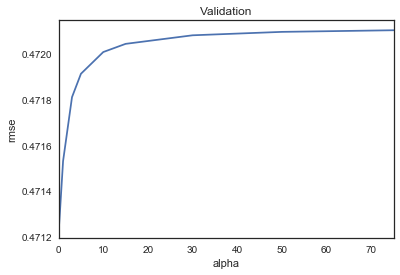

In [124]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, df_train_x, df_train_y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [125]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(df_train_x, df_train_y)
rmse_cv(model_lasso).mean()

0.47211224951435005

## Phase 5: Trying to apply NLP techniques in the features discussed above

In [126]:
df = pd.read_csv('train.csv')

For textual information, we use a Natural Language Processing pipeline to convert the corpus into a Document-Term-Matrix, whereby each listing (document) consists of a matrix of terms (processed words). With this in place, we can use Latent Dirichlet Allocation (LDA) to discover topics inherent in the corpus, classify the corpus according to the learned topics and use them as features for the regression model.<br><br>

<div class="alert alert-block alert-info">LDA is a generative Bayesian inference model that associates each document with a probability distribution over topics, where topics are probability distributions over words. It is an efficient way to analyse large volumes of text and is a more human interpretable method of topic modelling.</div>

In this project, I model the listing descriptions using LDA to explore emerging topics. The listing description field contains the bulk of the textual information found in a listing, and may contain important information that is not captured elsewhere. What emergent topics might we see from the rich text describing the history of a home, a host's beloved neighbourhood or it's carefully curated interiors?

In [127]:
nlp_feats = ['description']
corpus = df[nlp_feats]
df = df.drop(nlp_feats, axis = 1)
print("Dataset has {} rows, {} columns.".format(*df.shape))

Dataset has 74111 rows, 28 columns.


In [128]:
import nltk

from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from gensim.models.ldamodel import LdaModel

import itertools
from collections import Counter
from collections import defaultdict

import json
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [129]:
def preprocess_text(corpus):
    """Takes a corpus in list format and applies basic preprocessing steps of word tokenization,
     removing of english stop words, lower case and lemmatization."""
    processed_corpus = []
    english_words = set(nltk.corpus.words.words())
    english_stopwords = set(stopwords.words('english'))
    wordnet_lemmatizer = WordNetLemmatizer()
    tokenizer = RegexpTokenizer(r'[\w|!]+')
    for row in corpus:
        word_tokens = tokenizer.tokenize(row)
        word_tokens_lower = [t.lower() for t in word_tokens]
        word_tokens_lower_english = [t for t in word_tokens_lower if t in english_words or not t.isalpha()]
        word_tokens_no_stops = [t for t in word_tokens_lower_english if not t in english_stopwords]
        word_tokens_no_stops_lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in word_tokens_no_stops]
        processed_corpus.append(word_tokens_no_stops_lemmatized)
    return processed_corpus

In [130]:
def nlp_model_pipeline(processed_corpus):
    """Takes processed corpus and produce dictionary, doc_term_matrix and LDA model"""
    # Creates the term dictionary (every unique term in corpus is assigned an index)
    dictionary = Dictionary(processed_corpus)
    # Convert corpus into Document Term Matrix using dictionary prepared above
    doc_term_matrix = [dictionary.doc2bow(listing) for listing in processed_corpus]    
    return dictionary, doc_term_matrix

In [131]:
def LDA_topic_modelling(doc_term_matrix, dictionary, num_topics=3, passes=2):
    # Create an object for LDA model and train it on Document-Term-Matrix
    LDA = LdaModel
    ldamodel = LDA(doc_term_matrix, num_topics=num_topics, id2word = dictionary, passes=passes)
    return ldamodel

In [132]:
def add_topics_to_df(ldamodel, doc_term_matrix, df, new_col, num_topics):
    # Convert into Per-document topic probability matrix:
    docTopicProbMat = ldamodel[doc_term_matrix]
    docTopicProbDf = pd.DataFrame(index=df.index, columns=range(0, num_topics))
    for i, doc in enumerate(docTopicProbMat):
        for topic in doc:
            docTopicProbDf.iloc[i, topic[0]] = topic[1]
    docTopicProbDf[new_col] = pd.to_numeric(docTopicProbDf[new_col])
    docTopicProbDf[new_col] = docTopicProbDf.idxmax(axis=1)
    df_topics = docTopicProbDf[new_col]
    # Merge with df
    df_new = pd.concat([df, df_topics], axis=1)
    return df_new

In [133]:
corpus.head()

,description
0,"Beautiful, sunlit brownstone 1-bedroom in the ..."
1,Enjoy travelling during your stay in Manhattan...
2,The Oasis comes complete with a full backyard ...
3,This light-filled home-away-from-home is super...
4,"Cool, cozy, and comfortable studio located in ..."


In [134]:
nltk.download('words')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\anubgautam\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anubgautam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anubgautam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [135]:
%%time
corpus_description = corpus['description'].astype(str)
processed_corpus_description = preprocess_text(corpus_description)
dictionary_description, doc_term_matrix_description = nlp_model_pipeline(processed_corpus_description)

Wall time: 31.5 s


In [136]:
%%time
ldamodel_description = LDA_topic_modelling(doc_term_matrix_description, dictionary_description, num_topics=3, passes=10)

Wall time: 12min 57s


The topic models are visualised in an Intertopic Distance Map, which uses the brilliant gensim and pyLDAvis packages. In this visualisation, the area of the circles represent the prevalence of each topic while the length of the bars on the right represent the membership of a term in a particular topic. For example, topic 1 below has the most prevalent, and within topic 1 the term 'walk' has the highest estimated term frequency (red area) compared to the overall term frequency (blue and red area) of the term in the entire corpus.

In [137]:
%%time
p = pyLDAvis.gensim.prepare(ldamodel_description, doc_term_matrix_description, dictionary_description)

C:\Users\anubgautam\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


Wall time: 17min 52s


In [138]:
pyLDAvis.save_html(p, 'lda.html')

<img src="lda_ss.JPG">

The interactive HTML file for the trained topic model can be accessed in the project folder

I chose to cluster the document terms into 3 topics as it was the largest number of topics that had no overlaps with very distinct topics. The separate topics also makes sense within the context of AirBnb listings.

Based on the top terms in each topic, the topics for listings could be described as:<br>

- Topic 1 - Location: This focuses on location with words such as 'location', 'walk', 'station' and 'central'. This might appeal to travellers who value convenience and proximity to transport links, such as first-time tourists in London who want to maximise their time and visit all the attractions in Central London.
- Topic 2 - Luxury: This seems to focus on modern apartments, with words such as 'kitchen', 'modern', 'private'
 and 'space' standing out. This might appeal to travellers with a bigger budget and want to stay in a comfortable place with space and privacy (which is expensive in London!).
- Topic 3 - Budget: This focuses on words associated with more basic facilities such as 'bed', 'room', 'shower' and 'clean'. This might appeal to budget travellers who don't want to spend too much and are looking for listings that assure them of the basic amenities.

In [ ]:
# df = add_topics_to_df(ldamodel_description, doc_term_matrix_description, df, 'topics', num_topics=3)

# # Rename based on understanding of topics
# df['topics_description'].replace({0:'Location', 1:'Luxury', 2:'Budget'},inplace=True)
# df = pd.get_dummies(df, columns=['topics_description'], drop_first=False)

# print("Dataset has {} rows, {} columns.".format(*df.shape))

Adding the topic as a feature in our data

In [140]:
topic_transformed_df = X.copy()

In [141]:
raw_df.set_index('id', inplace=True)

In [142]:
raw_df.drop(17972519, inplace = True)

In [143]:
topic_transformed_df['description'] = raw_df['description'].values

In [144]:
# topic_datasets = pd.read_csv('train.csv')

In [145]:
# topic_datasets.set_index('id', inplace=True)

In [146]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')  
doc_term_matrix = count_vect.fit_transform(topic_transformed_df['description'].values.astype('U'))  

In [147]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=3)  
LDA.fit(doc_term_matrix)  

C:\Users\anubgautam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=3, n_jobs=1,
             n_topics=None, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

In [148]:
topic_values = LDA.transform(doc_term_matrix)  
topic_values.shape  

(74110, 3)

In [149]:
topic_transformed_df['topic'] = topic_values.argmax(axis=1)  

In [150]:
topic_transformed_df['topic'].replace({0:'Location', 1:'Luxury', 2:'Budget'},inplace=True)

In [151]:
topic_transformed_df = pd.get_dummies(topic_transformed_df, columns=['topic'], drop_first=False)

In [152]:
topic_transformed_df.drop('description', axis = 1, inplace = True)

Training on the dataset obtained after topic modelling

In [153]:
# Separating X and y
X1 = topic_transformed_df
y1 = y

# Scaling
scaler = StandardScaler()
X1 = pd.DataFrame(scaler.fit_transform(X1), columns=list(X1.columns))

In [154]:
# Splitting into train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.15, random_state=123)

In [155]:
xgb_reg_start = time.time()

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X1_train, y1_train)
training_preds_xgb_reg = xgb_reg.predict(X1_train)
val_preds_xgb_reg = xgb_reg.predict(X1_test)

xgb_reg_end = time.time()

print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

Time taken to run: 0.2 minutes

Training MSE: 0.1738
Validation MSE: 0.1794

Training r2: 0.661
Validation r2: 0.6572


In [156]:
test_data = pd.read_csv('test_nlp.csv')

In [157]:
test_data.set_index('id', inplace=True)

In [158]:
predictions = xgb_reg.predict(test_data)

In [159]:
np.savetxt("XGB_nlp_predictions.csv", predictions, delimiter=",")

In [160]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X1_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)

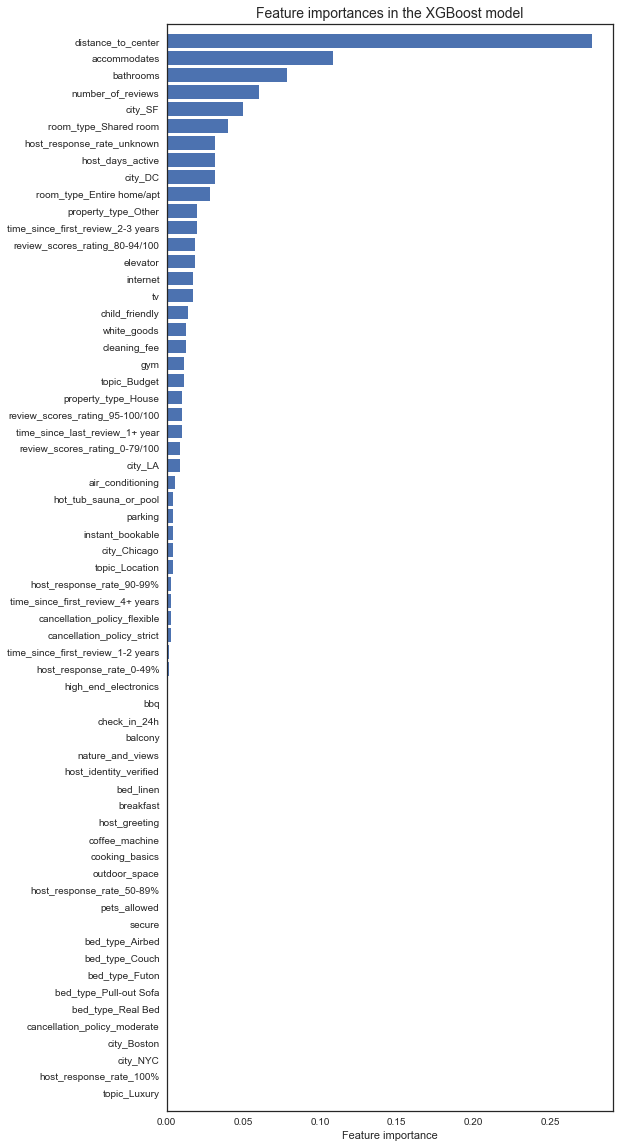

In [161]:
# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

The results after working with the topics are slightly improved. This validates the hypothesis that there is valuable information as modelling description text as topics increases the model's predictive accuracy, although it is a very small effect.

### Final model selection

Overall, the XGBoost model (Model 1) is the preferred model, which performs ever so slightly better than the best neural network (Model 7) and is less computationally expensive. Also the last model perofrms slighlty better after inclusion of topic description features. It could possibly be improved further with hyper-parameter tuning. 

## Conclusions and Recommendations

This is one of those situations where deep learning simply isn't necessary for prediction, and a machine learning model performs just as well.
However, even in the best performing model, the model was only able to explain 67% of the variation in price. The remaining 33% is probably made up of features that were not present in the data. It is likely that a significant proportion of this unexplained variance is due to variations in the listing photos. The photos of properties on Airbnb are very important in encouraging guests to book, and so can also be expected to have a significant impact on price - better photos (primarily better quality properties and furnishings, but also better quality photography) equal higher prices.

**Potential directions for future work**
- Find a way to incorporate image quality into the model, e.g. by using the output of a convolutional neural network to assess image quality as an input into the pricing model 
- Use better quality/more accurate data which includes the actual average prices paid per night
- Use geojson data of the cities to find out where the property quantity is dense and if that effects the prediction.
- Include a wider geographic area involving other major cities around the world
- Augment the model with natural language processing (NLP) of listing reviews, e.g. for sentiment analysis or looking for keywords
- In addition to predicting base prices, a sequence model could be created to calculate daily rates using data on seasonality and occupancy, which would allow the creation of actual pricing software
- Tailor the model more specifically to new listings in order to help hosts set prices for new properties, by removing features that would not be known at the time - e.g. other fees, availability and reviews